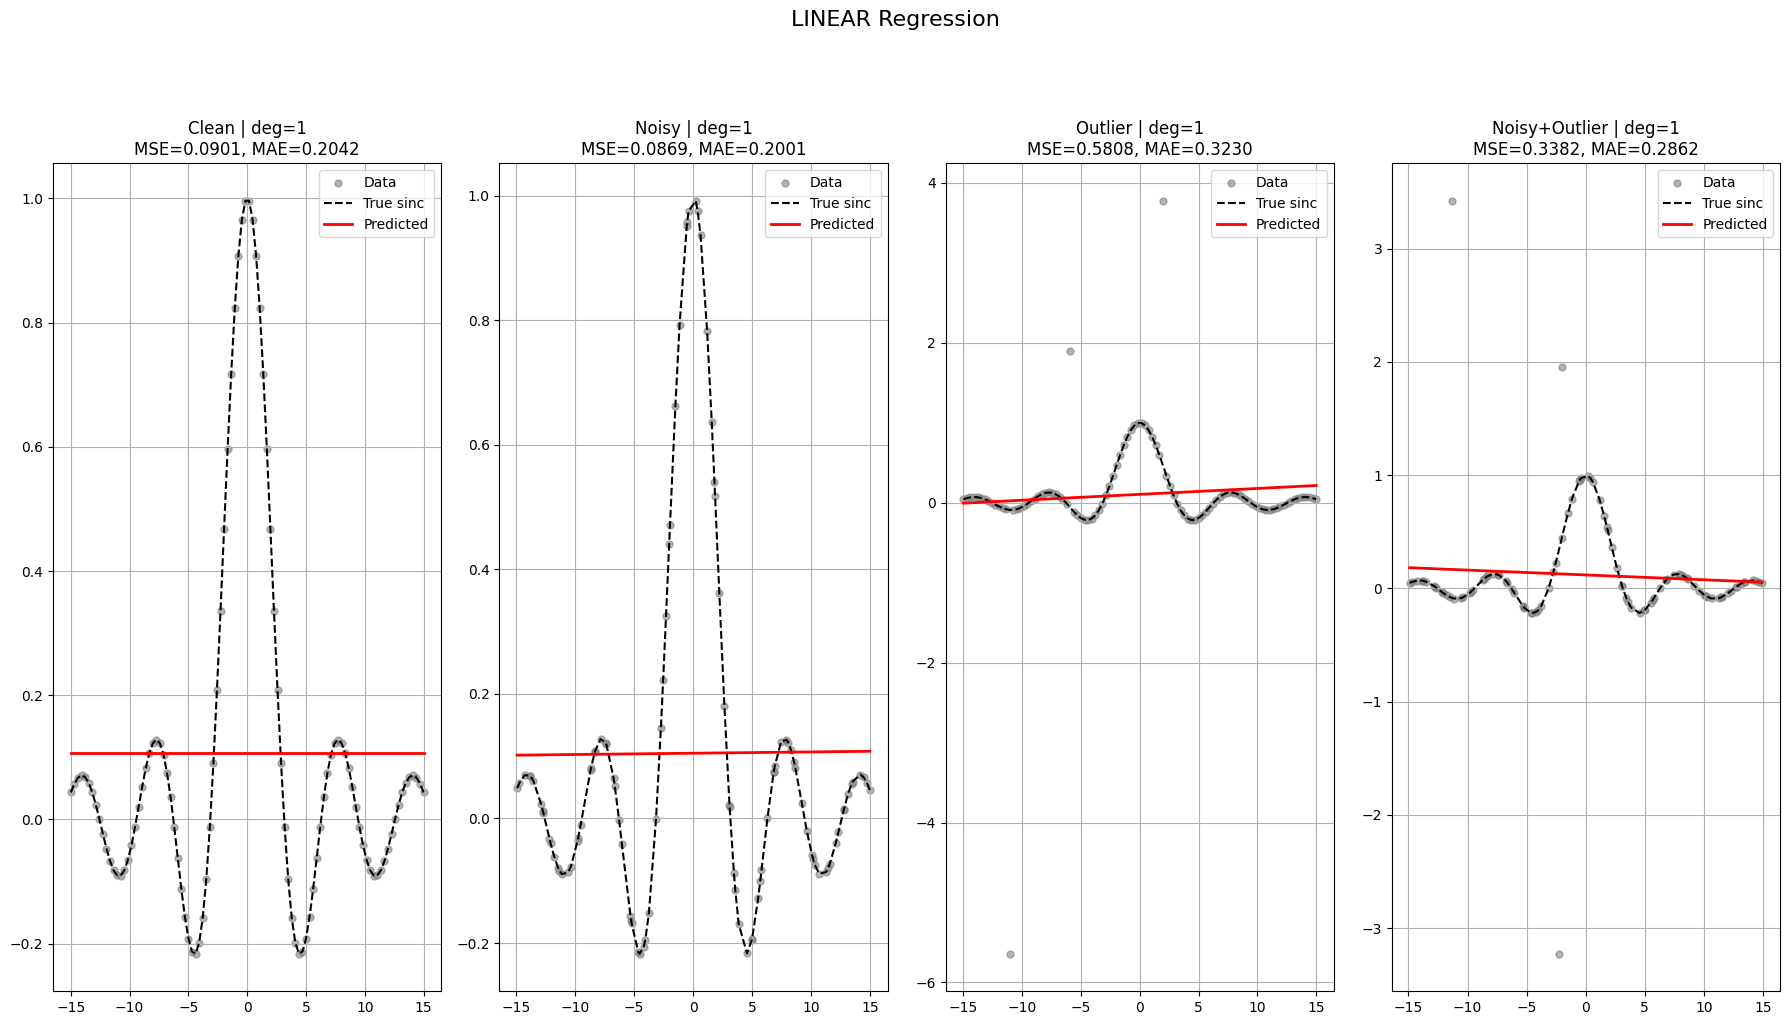

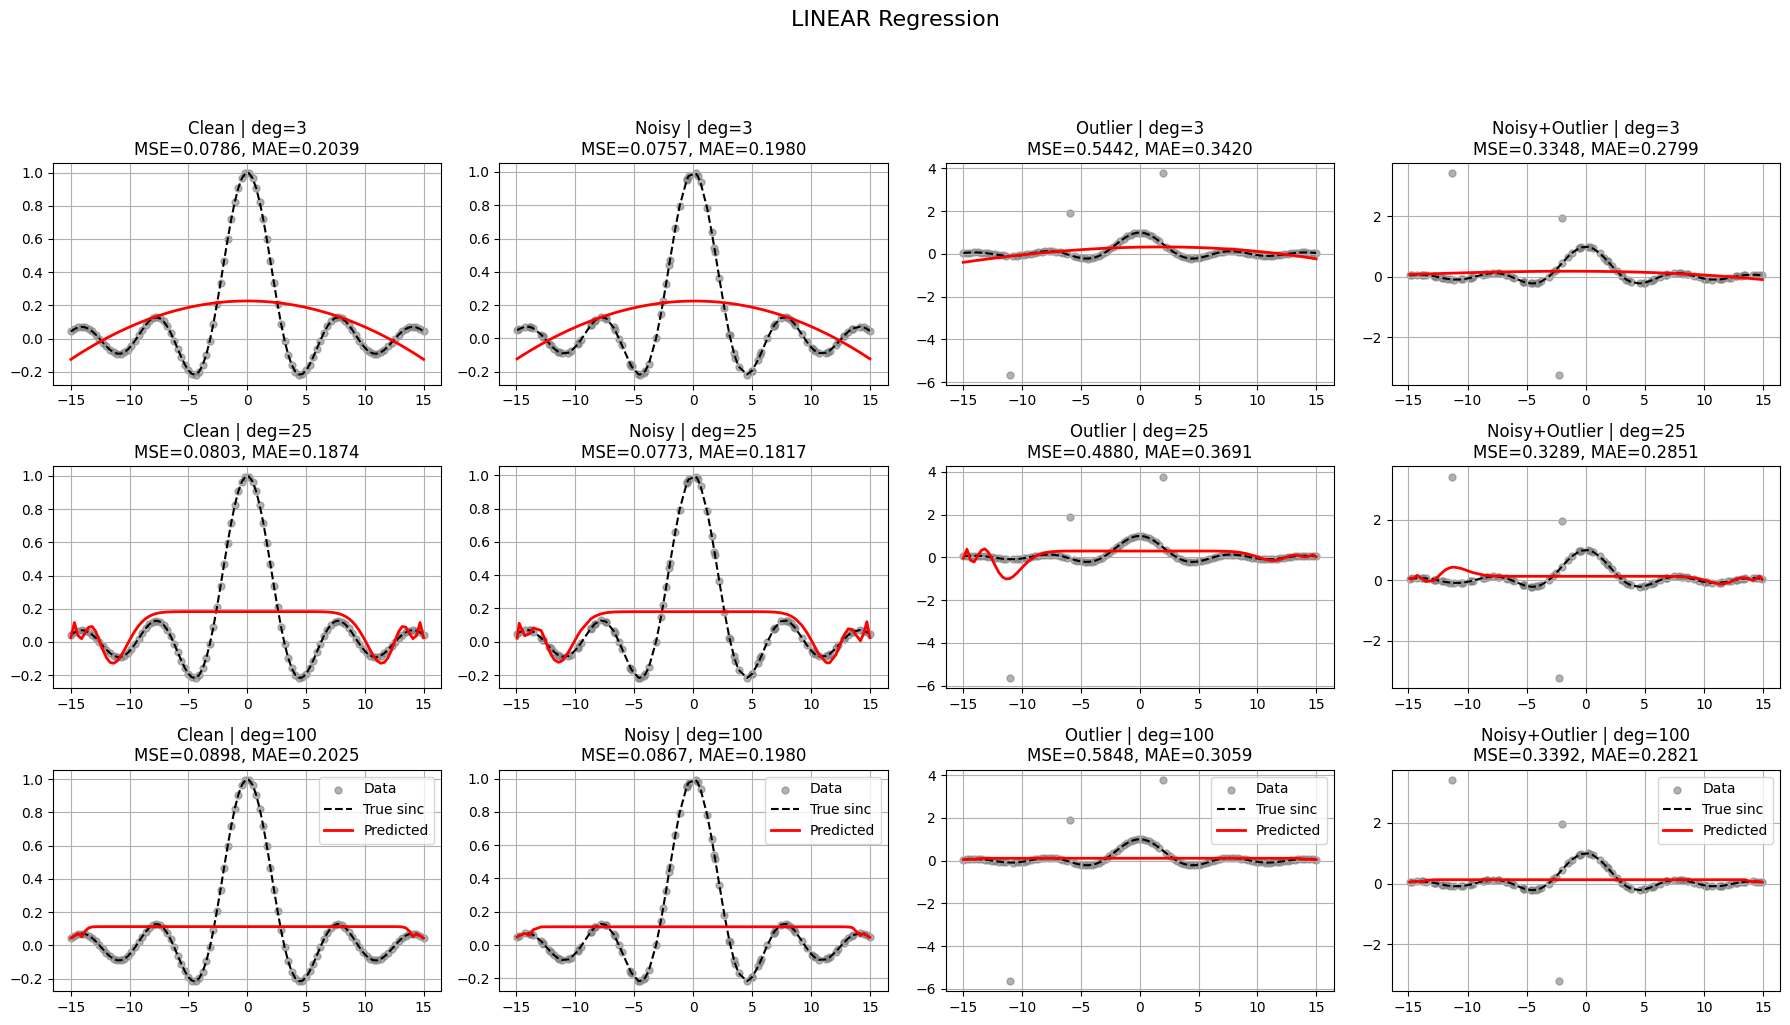

c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.02495e-61): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.02495e-61): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\ROSE PC\AppData\Local\Pro

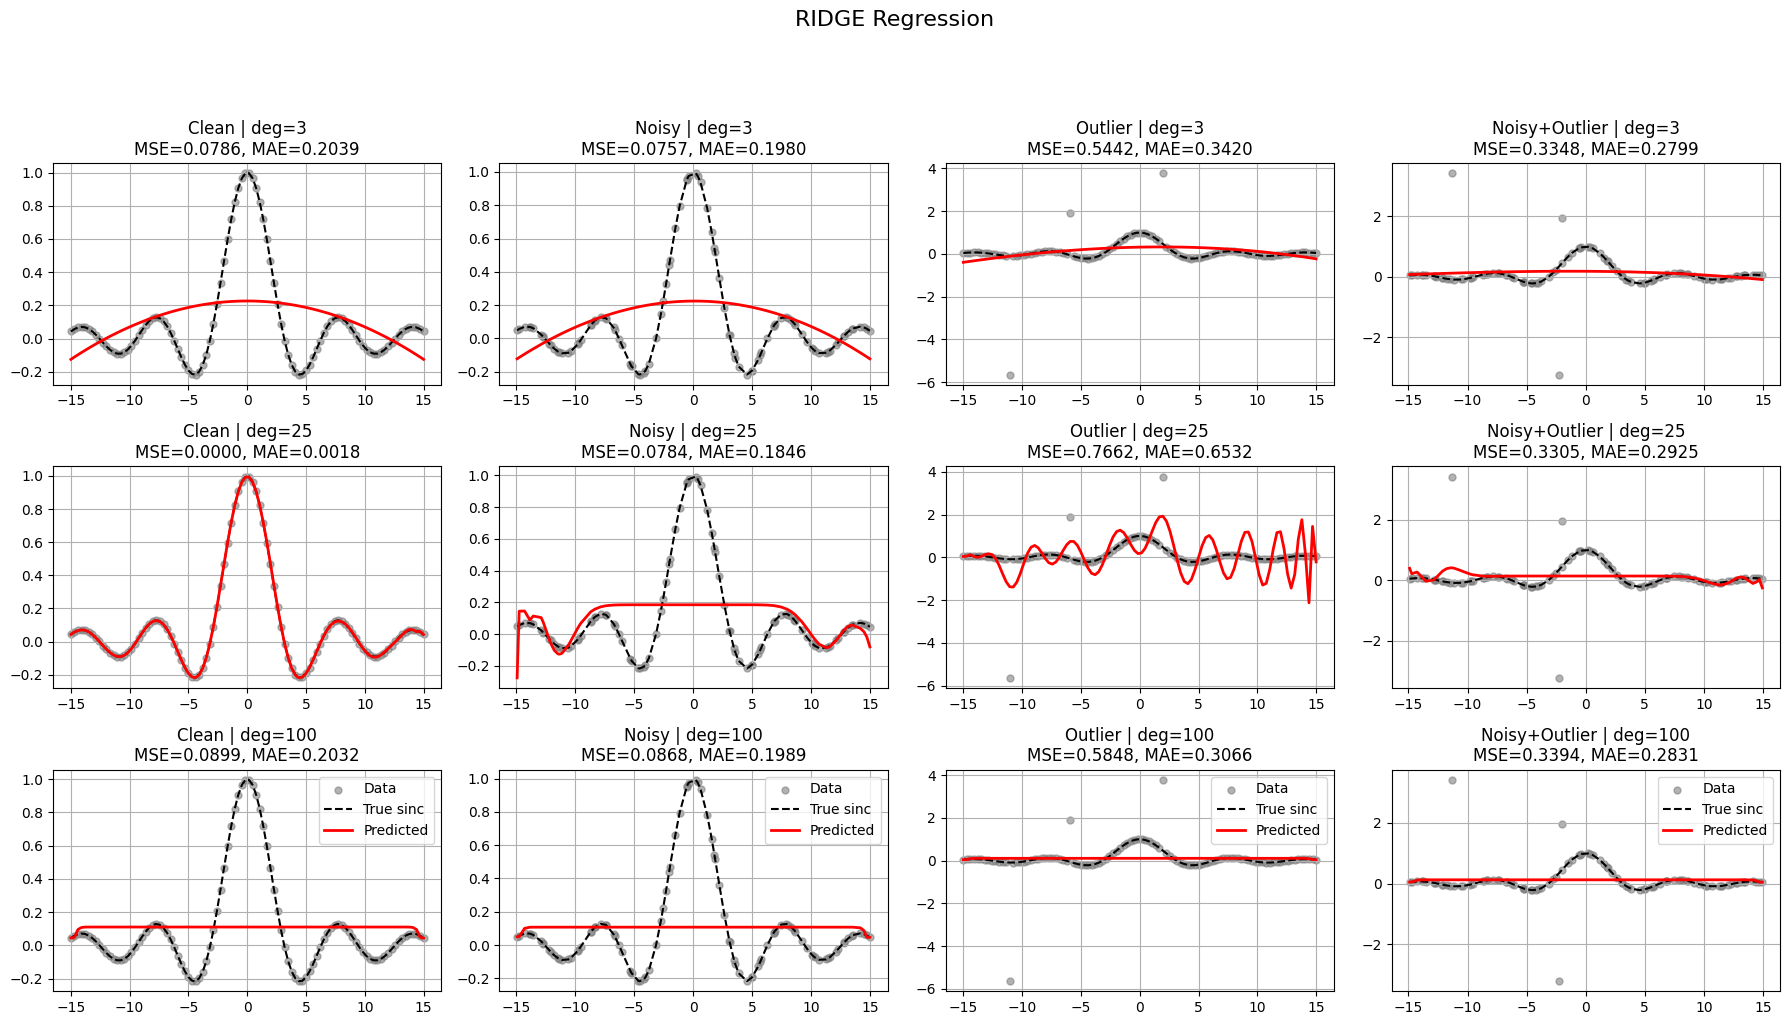

c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+00, tolerance: 9.007e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.671e+00, tolerance: 8.692e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

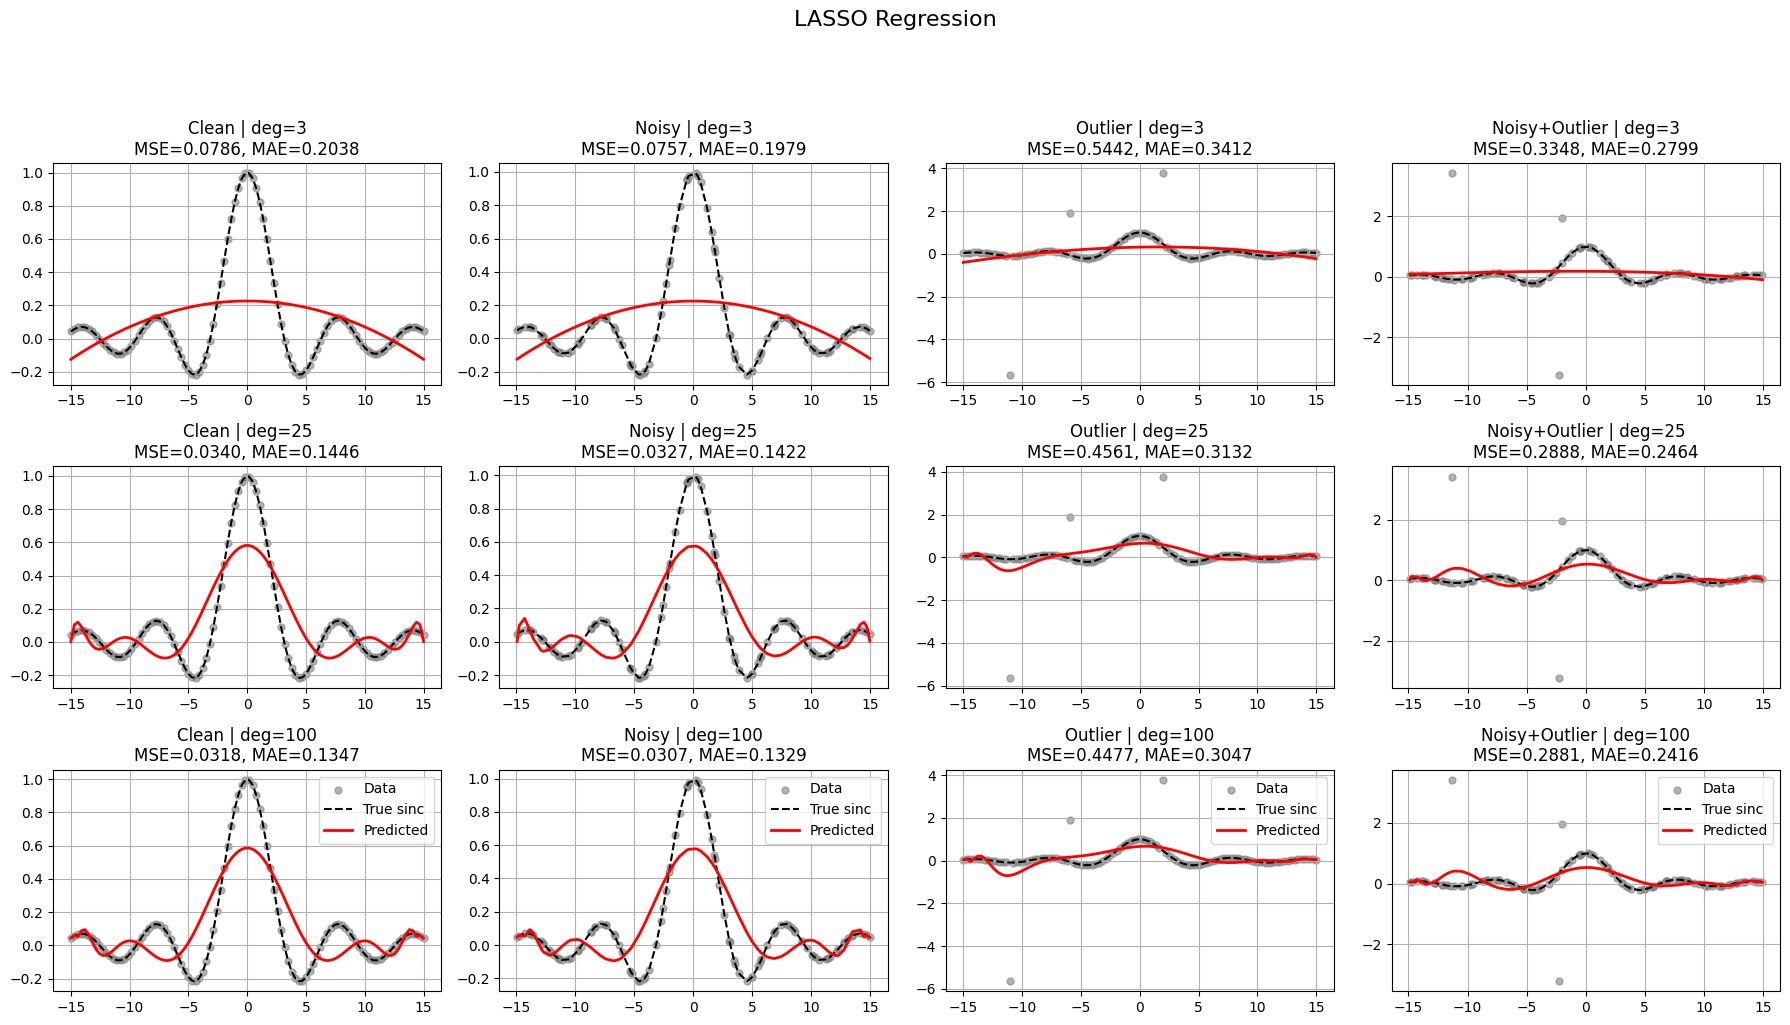

c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+00, tolerance: 9.007e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+00, tolerance: 8.692e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

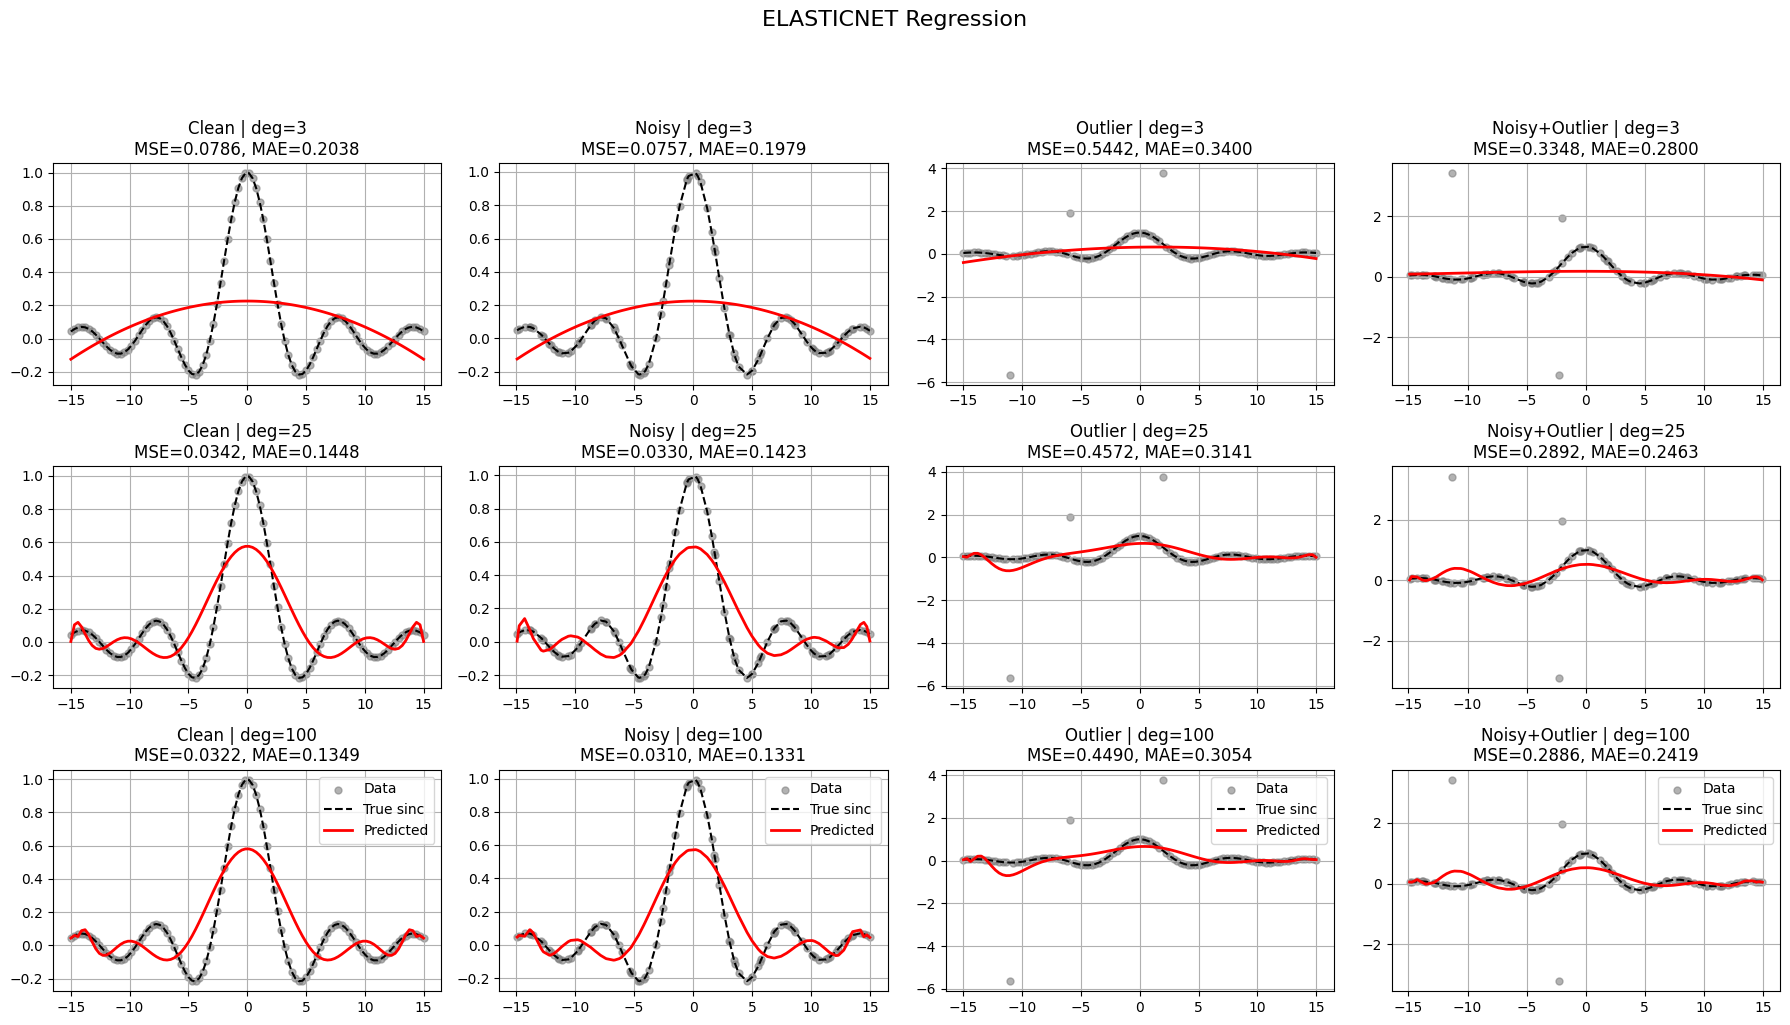


✅ بهترین هایپرپارامترها بر اساس کمترین MSE:

     Model       Dataset  Degree    MSE    MAE
elasticnet         Clean     100 0.0322 0.1349
elasticnet         Noisy     100 0.0310 0.1331
elasticnet Noisy+Outlier     100 0.2886 0.2419
elasticnet       Outlier     100 0.4490 0.3054
     lasso         Clean     100 0.0318 0.1347
     lasso         Noisy     100 0.0307 0.1329
     lasso Noisy+Outlier     100 0.2881 0.2416
     lasso       Outlier     100 0.4477 0.3047
    linear         Clean       3 0.0786 0.2039
    linear         Noisy       3 0.0757 0.1980
    linear Noisy+Outlier      25 0.3289 0.2851
    linear       Outlier      25 0.4880 0.3691
     ridge         Clean      25 0.0000 0.0018
     ridge         Noisy       3 0.0757 0.1980
     ridge Noisy+Outlier      25 0.3305 0.2925
     ridge       Outlier       3 0.5442 0.3420


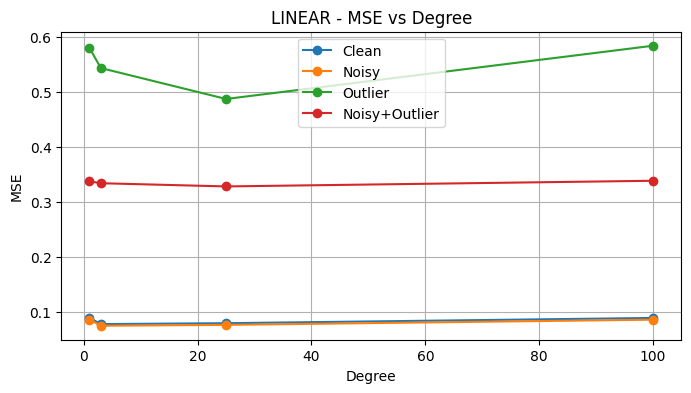

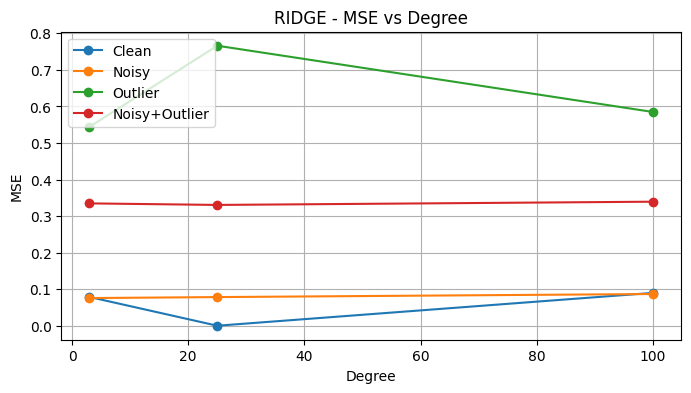

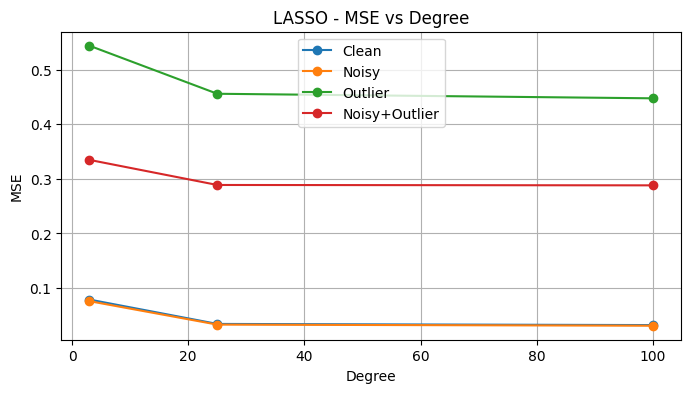

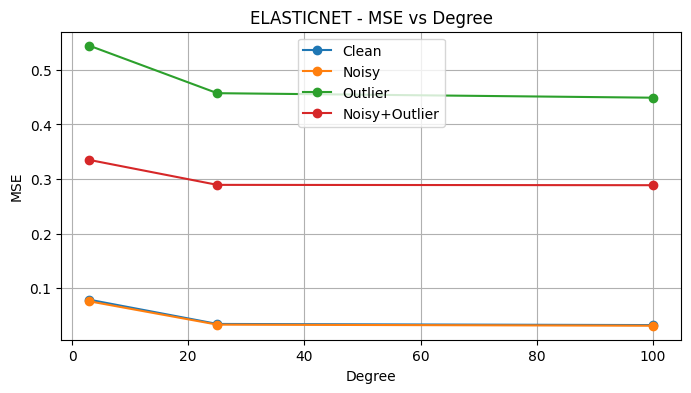

In [21]:
# -*- coding: utf-8 -*-
"""
تخمین تابع sinc با مدل‌های مختلف و سه درجه‌ی چندجمله‌ای
شامل: Linear, Polynomial, Ridge, Lasso, ElasticNet
نشان دادن MSE و MAE برای ۴ حالت داده (clean, noisy, outlier, noisy+outlier)
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -----------------------------
# تابع sinc
# -----------------------------
def sinc(x):
    return np.sinc(x / np.pi)

# -----------------------------
# داده‌ها
# -----------------------------
np.random.seed(42)
n_points = 100
x = np.linspace(-15, 15, n_points)
y_true = sinc(x)

# داده‌های مختلف
noise_std = 0.2
x_noisy = x + np.random.normal(0, noise_std, n_points)

def add_outliers(y, percentage=0.03, magnitude=3.0):
    y_out = y.copy()
    n_outliers = int(len(y) * percentage)
    idx = np.random.choice(len(y), n_outliers, replace=False)
    y_out[idx] += magnitude * np.random.randn(n_outliers)
    return y_out

# چهار حالت داده
datasets = {
    "Clean": (x, sinc(x)),
    "Noisy": (x_noisy, sinc(x_noisy)),
    "Outlier": (x, add_outliers(sinc(x))),
    "Noisy+Outlier": (x_noisy, add_outliers(sinc(x_noisy)))
}

# -----------------------------
# تابع آموزش و محاسبه خطا
# -----------------------------
def fit_and_evaluate(x, y, model_name, degree, alpha=0.1, l1_ratio=0.5):
    X = x.reshape(-1, 1)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    if model_name == 'linear':
        model = LinearRegression()
    elif model_name == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_name == 'lasso':
        model = Lasso(alpha=alpha, max_iter=10000)
    elif model_name == 'elasticnet':
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    else:
        raise ValueError("مدل ناشناخته!")

    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return y_pred, mse, mae

# -----------------------------
# تابع رسم نمودار برای هر مدل
# -----------------------------
def plot_model_results(model_name, degrees, alpha=0.1, l1_ratio=0.5):
    fig, axs = plt.subplots(len(degrees), 4, figsize=(18, 10))
    fig.suptitle(f"{model_name.upper()} Regression", fontsize=16, y=1.02)

    results = []

    for i, degree in enumerate(degrees):
        for j, (name, (x_d, y_d)) in enumerate(datasets.items()):
            y_pred, mse, mae = fit_and_evaluate(x_d, y_d, model_name, degree, alpha, l1_ratio)
            order = np.argsort(x_d)
            ax = axs[i, j] if len(degrees) > 1 else axs[j]
            ax.scatter(x_d, y_d, color='gray', s=25, alpha=0.6, label='Data')
            ax.plot(x_d[order], sinc(x_d[order]), 'k--', lw=1.5, label='True sinc')
            ax.plot(x_d[order], y_pred[order], 'r', lw=2, label='Predicted')
            ax.set_title(f"{name} | deg={degree}\nMSE={mse:.4f}, MAE={mae:.4f}")
            ax.grid(True)
            if i == len(degrees) - 1:
                ax.legend()
            results.append((model_name, name, degree, mse, mae))

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    return results

# -----------------------------
# اجرای همه مدل‌ها
# -----------------------------
all_results = []

# 1️⃣ Linear
all_results += plot_model_results('linear', [1])

# 2️⃣ Polynomial (در واقع Linear با درجات بالاتر)
all_results += plot_model_results('linear', [3, 25, 100])

# 3️⃣ Ridge
all_results += plot_model_results('ridge', [3, 25, 100], alpha=0.1)

# 4️⃣ Lasso
all_results += plot_model_results('lasso', [3, 25, 100], alpha=0.01)

# 5️⃣ ElasticNet
all_results += plot_model_results('elasticnet', [3, 25, 100], alpha=0.05, l1_ratio=0.5)

# -----------------------------
# تحلیل و نمایش بهترین‌ها
# -----------------------------
import pandas as pd

df = pd.DataFrame(all_results, columns=["Model", "Dataset", "Degree", "MSE", "MAE"])

# بهترین تنظیمات بر اساس کمترین MSE
best_by_dataset = df.loc[df.groupby(["Model", "Dataset"])["MSE"].idxmin()]

print("\n✅ بهترین هایپرپارامترها بر اساس کمترین MSE:\n")
print(best_by_dataset.to_string(index=False))

# نمودار تغییر MSE برای هر مدل بر اساس درجه
for model in df["Model"].unique():
    subset = df[df["Model"] == model]
    plt.figure(figsize=(8, 4))
    for ds in datasets.keys():
        sub = subset[subset["Dataset"] == ds]
        plt.plot(sub["Degree"], sub["MSE"], marker='o', label=ds)
    plt.title(f"{model.upper()} - MSE vs Degree")
    plt.xlabel("Degree")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()


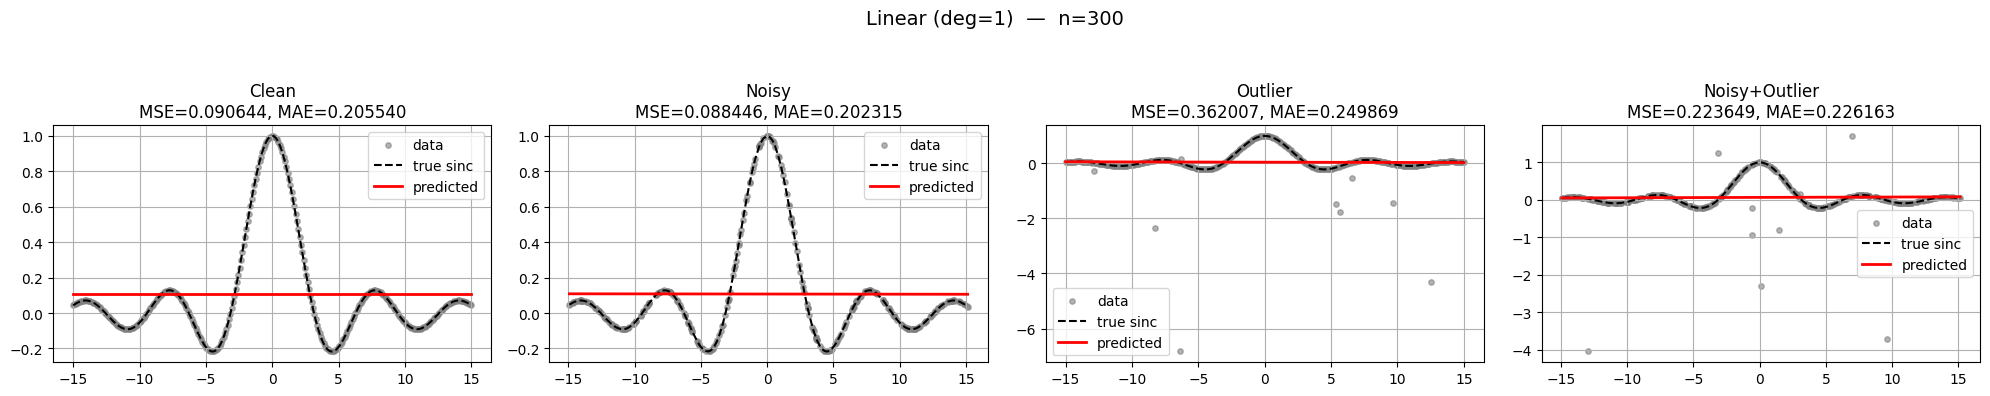

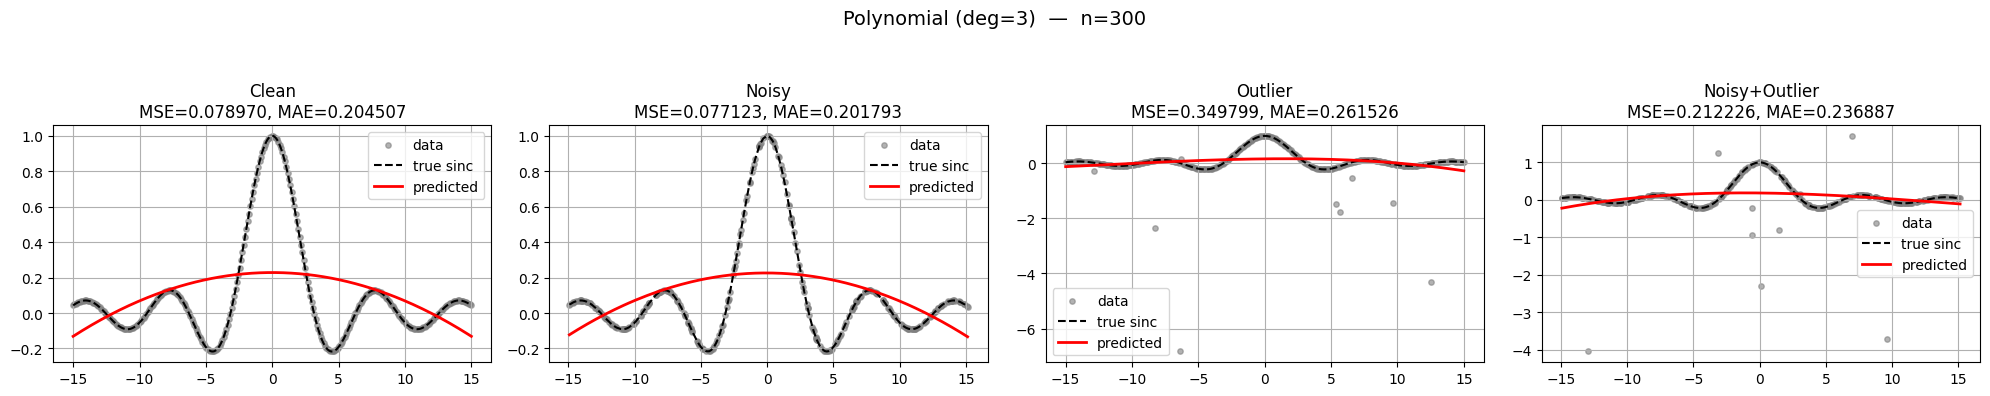

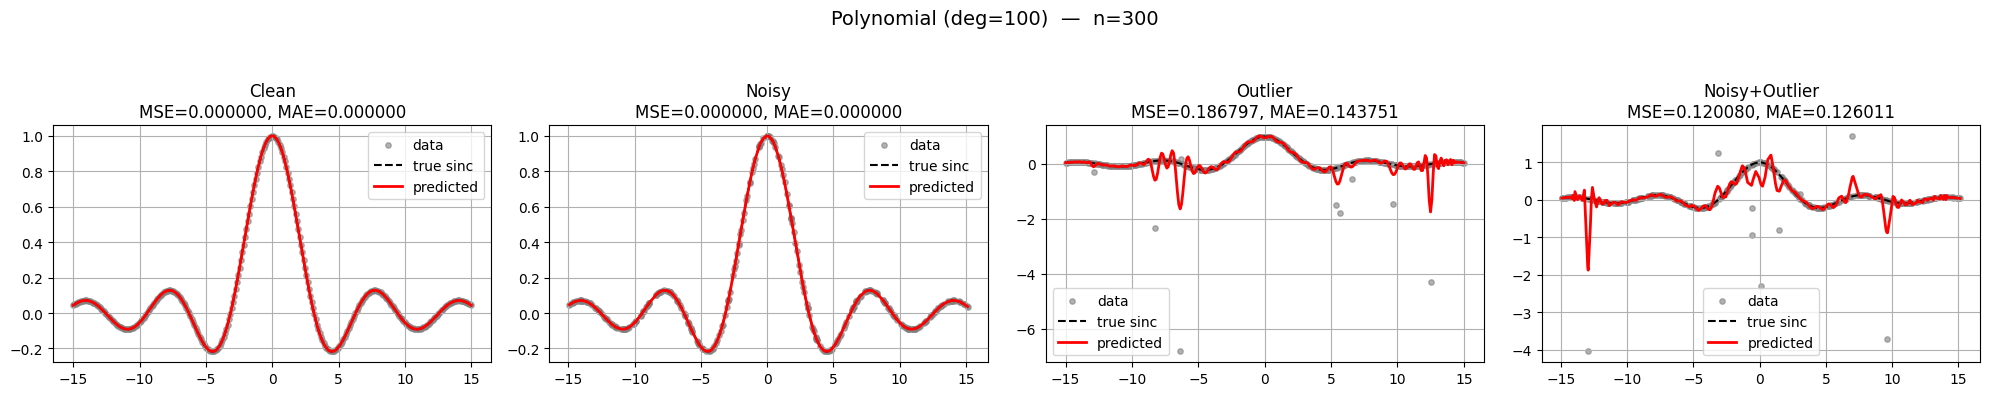

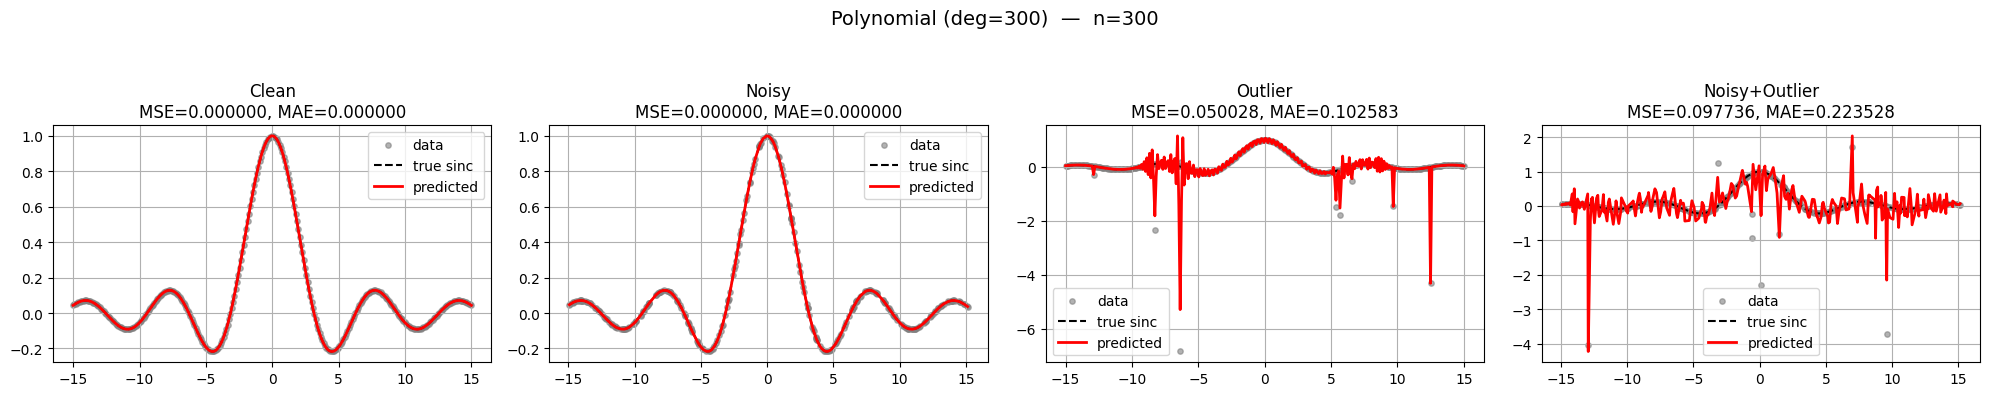

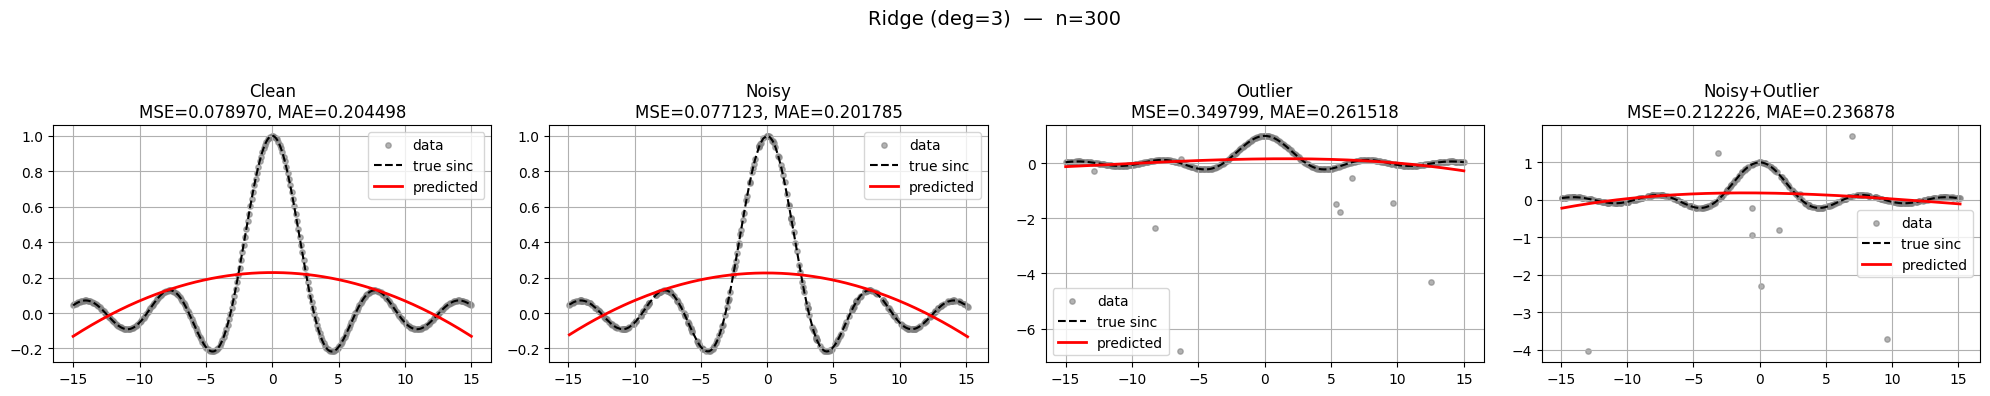

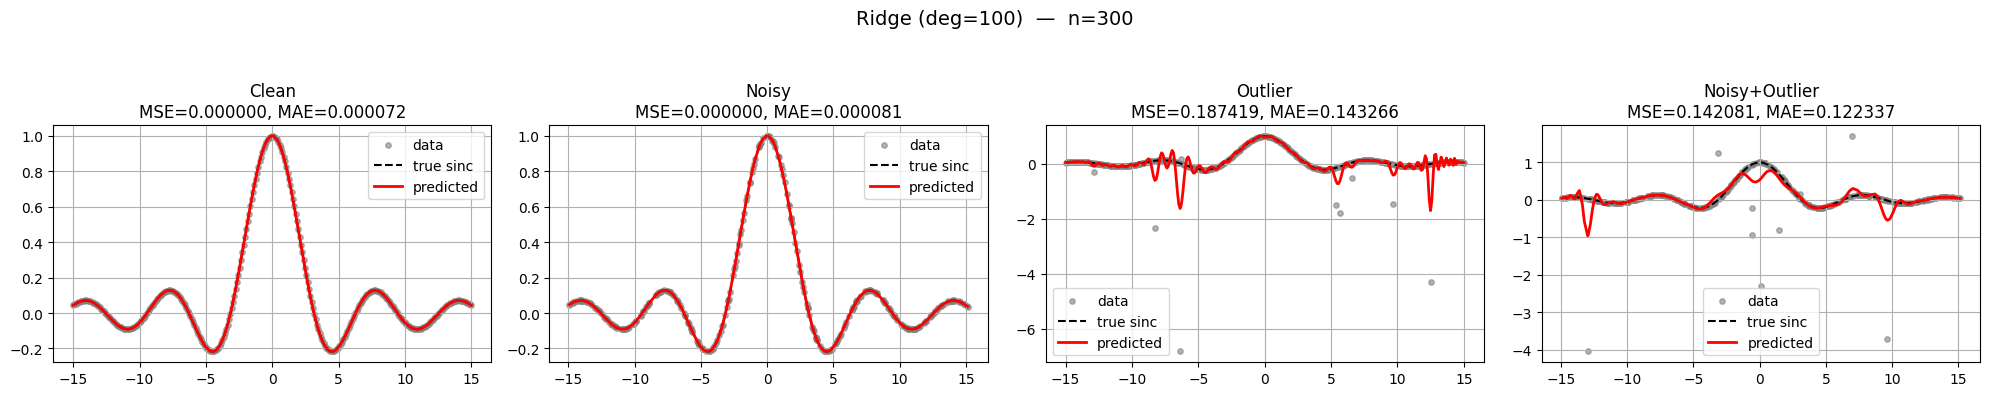

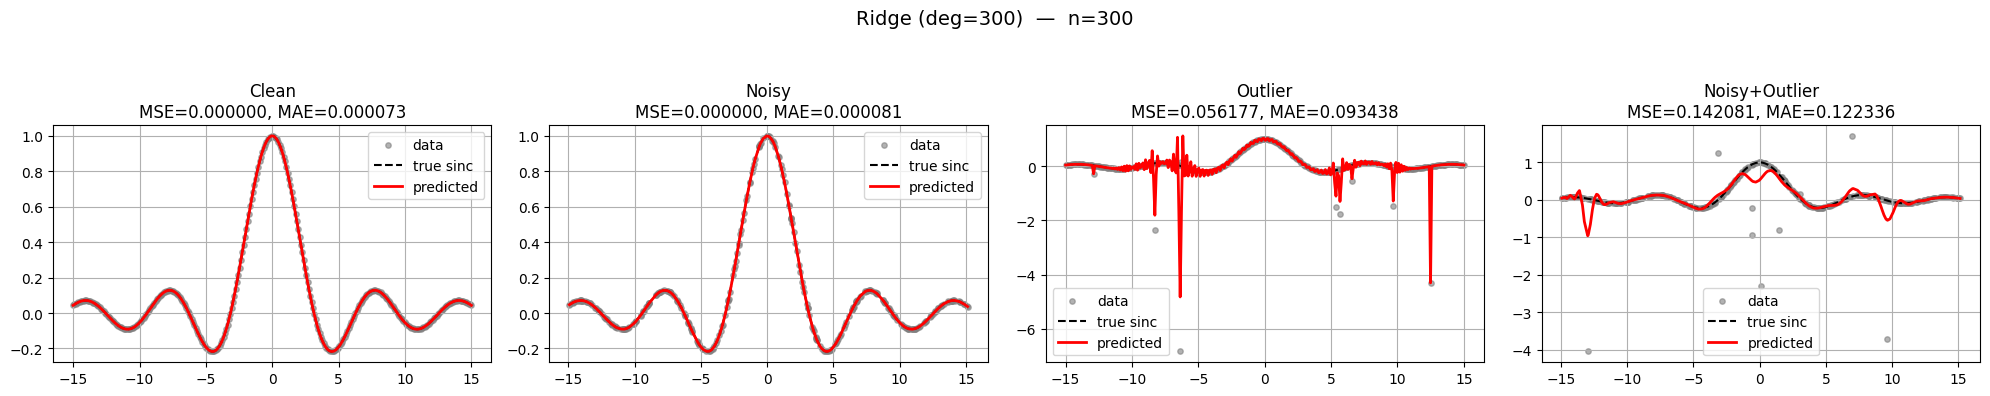

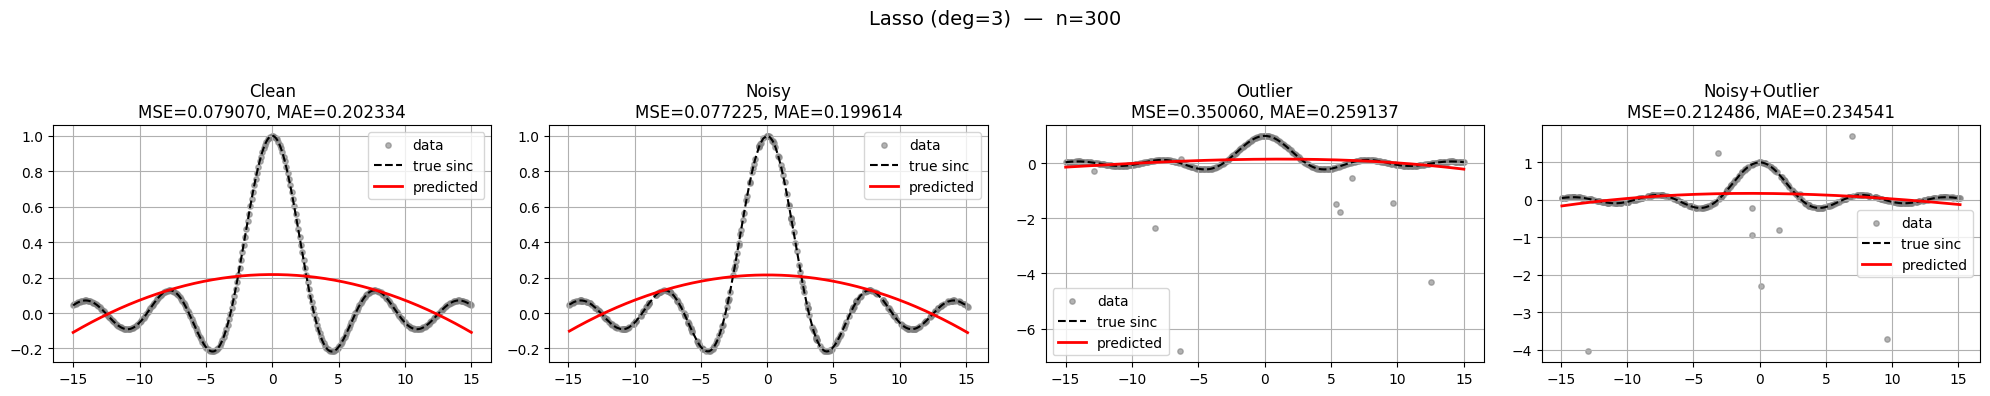

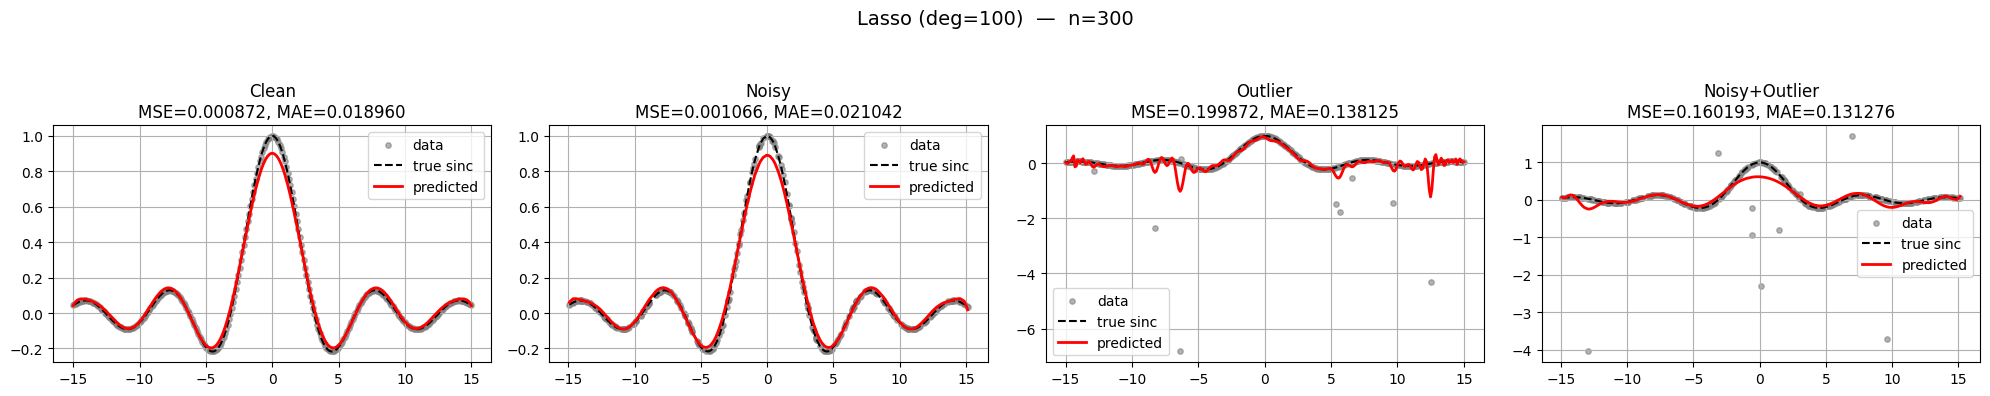

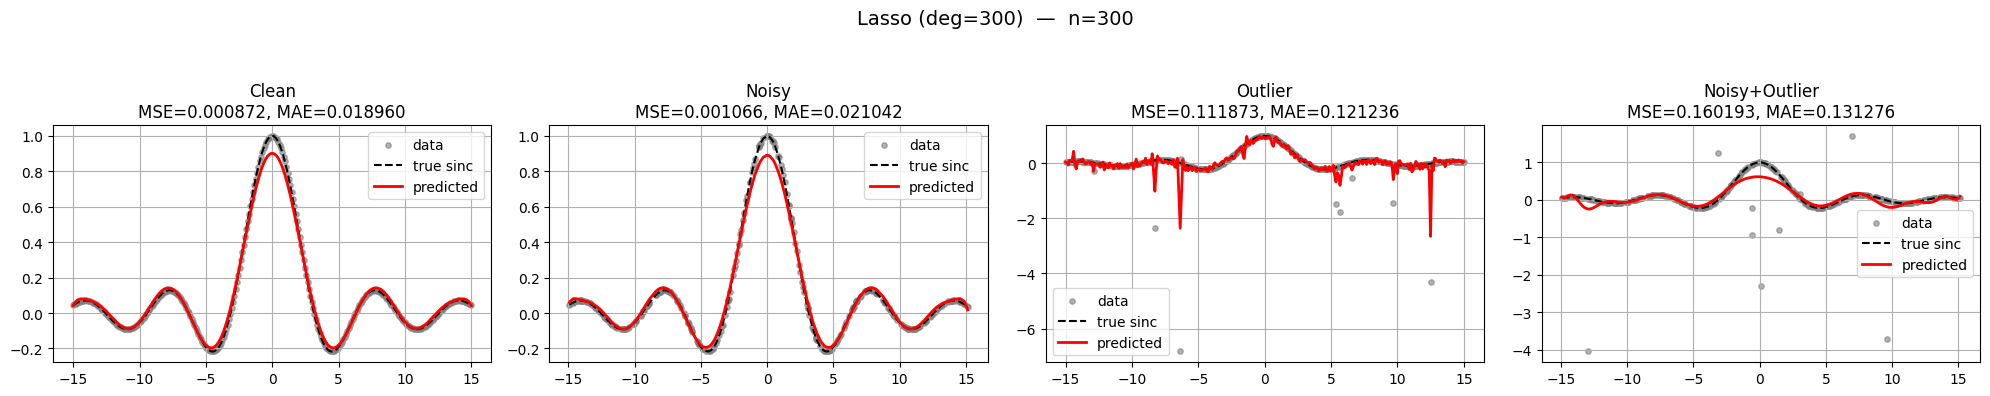

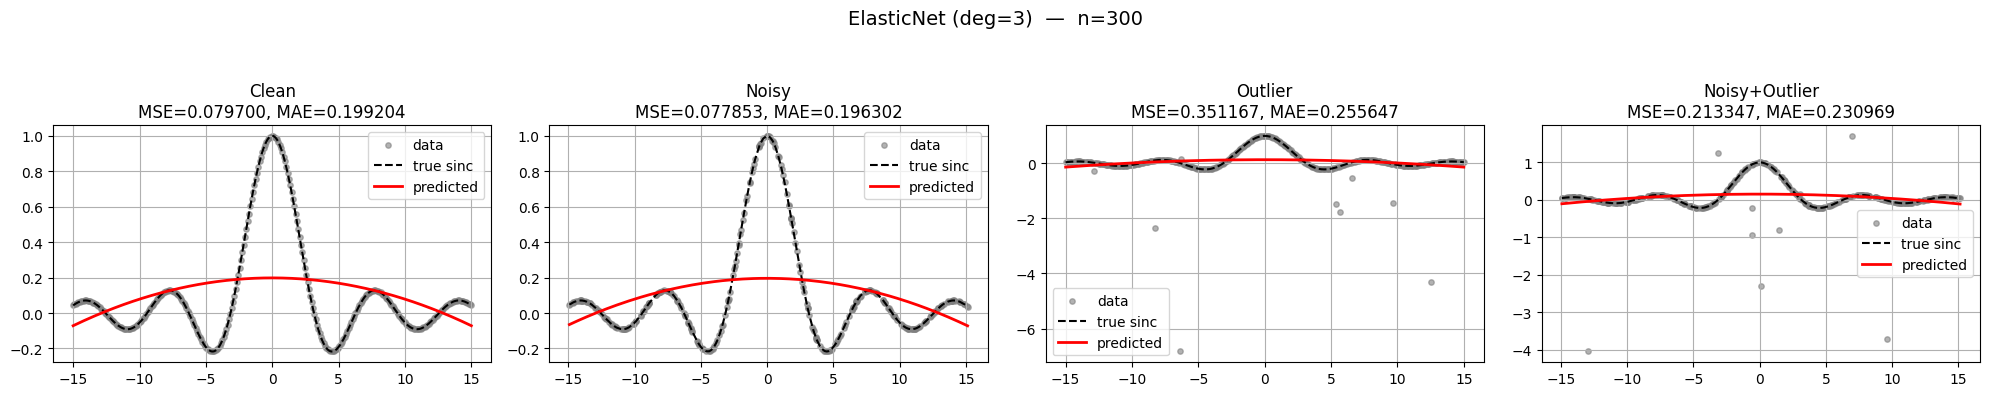

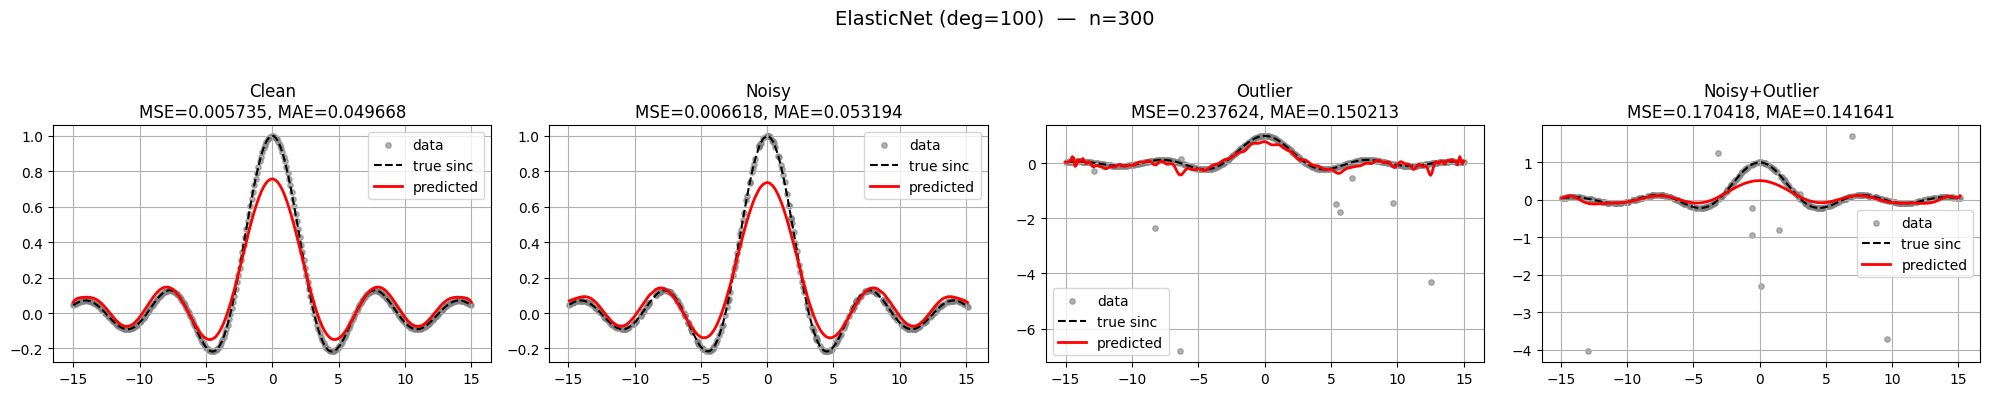

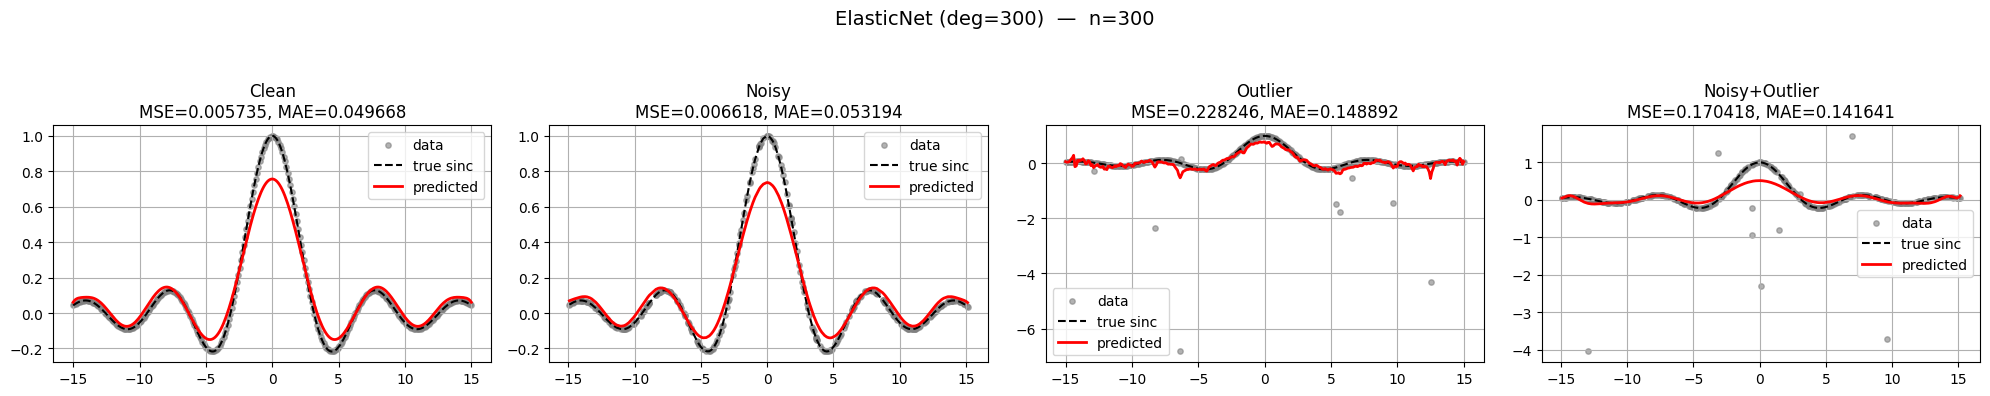


=== BEST (based on MSE) per Model & Dataset ===

     Model  Degree       Dataset    MSE    MAE
ElasticNet     100         Clean 0.0057 0.0497
ElasticNet     100         Noisy 0.0066 0.0532
ElasticNet     100 Noisy+Outlier 0.1704 0.1416
ElasticNet     300       Outlier 0.2282 0.1489
     Lasso     100         Clean 0.0009 0.0190
     Lasso     100         Noisy 0.0011 0.0210
     Lasso     100 Noisy+Outlier 0.1602 0.1313
     Lasso     300       Outlier 0.1119 0.1212
    Linear       1         Clean 0.0906 0.2055
    Linear       1         Noisy 0.0884 0.2023
    Linear       1 Noisy+Outlier 0.2236 0.2262
    Linear       1       Outlier 0.3620 0.2499
Polynomial     100         Clean 0.0000 0.0000
Polynomial     100         Noisy 0.0000 0.0000
Polynomial     300 Noisy+Outlier 0.0977 0.2235
Polynomial     300       Outlier 0.0500 0.1026
     Ridge     100         Clean 0.0000 0.0001
     Ridge     100         Noisy 0.0000 0.0001
     Ridge     300 Noisy+Outlier 0.1421 0.1223
     Ridge

In [23]:
# -*- coding: utf-8 -*-
"""
Stable implementation for n=300 using orthogonal Legendre basis to avoid overflow
Degrees tested: 3, 100, 300
Four datasets: Clean, Noisy (Gaussian on x), Outlier (3%), Noisy+Outlier
Models: Linear (degree=1), Polynomial (via Legendre basis), Ridge, Lasso, ElasticNet
Computes MSE and MAE and shows 3x4 (rows=degrees, cols=datasets) plots per model.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy.polynomial.legendre import legvander
import warnings
warnings.filterwarnings("ignore")  # برای واضح‌تر بودن خروجی (اختیاری)

# ---------------------------
# تنظیمات پایه
# ---------------------------
np.random.seed(42)
n_points = 300
x = np.linspace(-15, 15, n_points)
# تعریف sinc (safe)
def sinc(xv):
    y = np.ones_like(xv, dtype=float)
    nz = xv != 0
    y[nz] = np.sin(xv[nz]) / xv[nz]
    return y

y_true = sinc(x)

# نویز و اوت لایر
noise_std = 0.2
x_noisy = x + np.random.normal(0, noise_std, size=n_points)

def add_outliers(y, percentage=0.03, magnitude=3.0):
    y_out = y.copy()
    n_outliers = max(1, int(len(y) * percentage))
    idx = np.random.choice(len(y), n_outliers, replace=False)
    y_out[idx] += magnitude * np.random.randn(n_outliers)
    return y_out

datasets = {
    "Clean": (x.copy(), sinc(x.copy())),
    "Noisy": (x_noisy.copy(), sinc(x_noisy.copy())),
    "Outlier": (x.copy(), add_outliers(sinc(x.copy()))),
    "Noisy+Outlier": (x_noisy.copy(), add_outliers(sinc(x_noisy.copy())))
}

# ---------------------------
# تولید ماتریس طراحی پایدار با استفاده از چندجمله‌ای‌های لژاندر
# legvander expects x scaled to [-1,1]. We'll scale accordingly.
# ---------------------------
def design_matrix_legendre(x_arr, degree, x_domain=(-15, 15)):
    """
    Returns design matrix using Legendre polynomials up to given degree (inclusive).
    x_arr: shape (n,)
    degree: int (e.g. 3,100,300)
    """
    # Scale x to [-1,1]
    a, b = x_domain
    x_scaled = 2 * (x_arr - a) / (b - a) - 1
    # legvander returns columns [P0(x), P1(x), ..., Pdeg(x)] shape (n, degree+1)
    V = legvander(x_scaled, degree)
    return V  # dtype float64, numerically stable in [-1,1]

# ---------------------------
# helper: fit model on design matrix (with optional scaling of columns)
# ---------------------------
from sklearn.pipeline import make_pipeline

def fit_and_eval_via_design(X_design, y, model_type='linear', alpha=0.1, l1_ratio=0.5):
    """
    X_design: (n, p) design matrix (already computed, e.g. legendre)
    y: (n,)
    model_type: 'linear','ridge','lasso','elasticnet'
    Returns: y_pred, mse, mae, fitted_model
    """
    # scale features (important for Lasso/ElasticNet)
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X_design)

    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'ridge':
        model = Ridge(alpha=alpha, max_iter=20000)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha, max_iter=200000)
    elif model_type == 'elasticnet':
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=200000)
    else:
        raise ValueError("Unknown model_type")

    model.fit(Xs, y)
    y_pred = model.predict(Xs)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return y_pred, mse, mae, model

# ---------------------------
# مدل‌ها و درجات
# ---------------------------
degrees = [3, 100, 300]   # طبق درخواست
models_to_run = [
    ('Linear', 'linear', [1]),          # linear as degree=1 (we will use legendre degree=1)
    ('Polynomial', 'linear', degrees),  # polynomial via ordinary linear regression on legendre basis
    ('Ridge', 'ridge', degrees),
    ('Lasso', 'lasso', degrees),
    ('ElasticNet', 'elasticnet', degrees)
]
# ثابت‌ها برای منظم‌سازی (همان که گفتی)
ridge_alpha = 0.1
lasso_alpha = 0.01
enet_alpha = 0.05
enet_l1 = 0.5

# برای ذخیره نتایج
results = []

# ---------------------------
# اجرای مدل‌ها
# ---------------------------
for model_label, model_type, deg_list in models_to_run:
    # اگر لیست degree فقط [1] باشه، همان Linearِ ساده است
    for deg in deg_list:
        # ساخت design برای هر دیتاست و آموزش مجزا
        preds = {}
        metrics = {}
        for ds_name, (x_d, y_d) in datasets.items():
            # design matrix with Legendre basis up to degree 'deg'
            # NOTE: for Linear (deg=1) this yields columns P0 and P1 -> includes bias automatically
            X_design = design_matrix_legendre(x_d, deg, x_domain=(x.min(), x.max()))
            # انتخاب مدل و پارامترها
            if model_type == 'linear':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'linear')
            elif model_label == 'Polynomial' and model_type == 'linear':
                # Polynomial used as linear-regression on legendre basis
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'linear')
            elif model_label == 'Ridge':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'ridge', alpha=ridge_alpha)
            elif model_label == 'Lasso':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'lasso', alpha=lasso_alpha)
            elif model_label == 'ElasticNet':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'elasticnet', alpha=enet_alpha, l1_ratio=enet_l1)
            else:
                # fallback
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, model_type)
            preds[ds_name] = (x_d, y_d, y_pred)
            metrics[ds_name] = {'mse': mse, 'mae': mae}
            # Save summary row
            results.append({
                'Model': model_label,
                'Degree': deg,
                'Dataset': ds_name,
                'MSE': mse,
                'MAE': mae
            })
        # رسم  (rows = degree index (single deg here), cols = 4 datasets)
        # we'll plot for this model_label & deg:
        fig, axes = plt.subplots(1, 4, figsize=(20,4))
        fig.suptitle(f"{model_label} (deg={deg})  —  n={n_points}", fontsize=14)
        for ax, ds_name in zip(axes, ['Clean','Noisy','Outlier','Noisy+Outlier']):
            x_d, y_d, y_pred = preds[ds_name]
            order = np.argsort(x_d)
            ax.scatter(x_d, y_d, s=15, alpha=0.6, color='gray', label='data')
            ax.plot(x_d[order], sinc(x_d[order]), 'k--', lw=1.5, label='true sinc')
            ax.plot(x_d[order], y_pred[order], 'r', lw=2, label='predicted')
            ax.set_title(f"{ds_name}\nMSE={metrics[ds_name]['mse']:.6f}, MAE={metrics[ds_name]['mae']:.6f}")
            ax.grid(True)
            ax.legend()
        plt.tight_layout(rect=[0,0,1,0.92])
        plt.show()

# ---------------------------
# گزارش خلاصه: بهترین (بر اساس MSE) برای هر مدل و dataset
# ---------------------------
import pandas as pd
df = pd.DataFrame(results)
best_summary = df.loc[df.groupby(['Model','Dataset'])['MSE'].idxmin()].reset_index(drop=True)
print("\n=== BEST (based on MSE) per Model & Dataset ===\n")
print(best_summary.to_string(index=False))


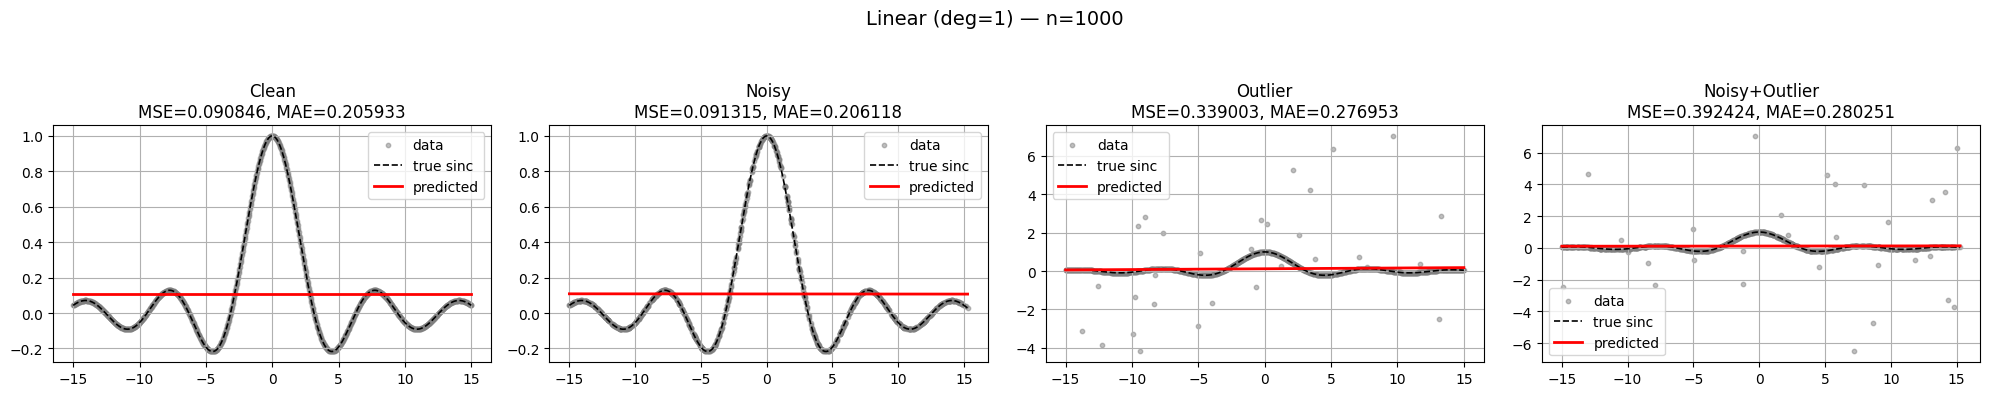

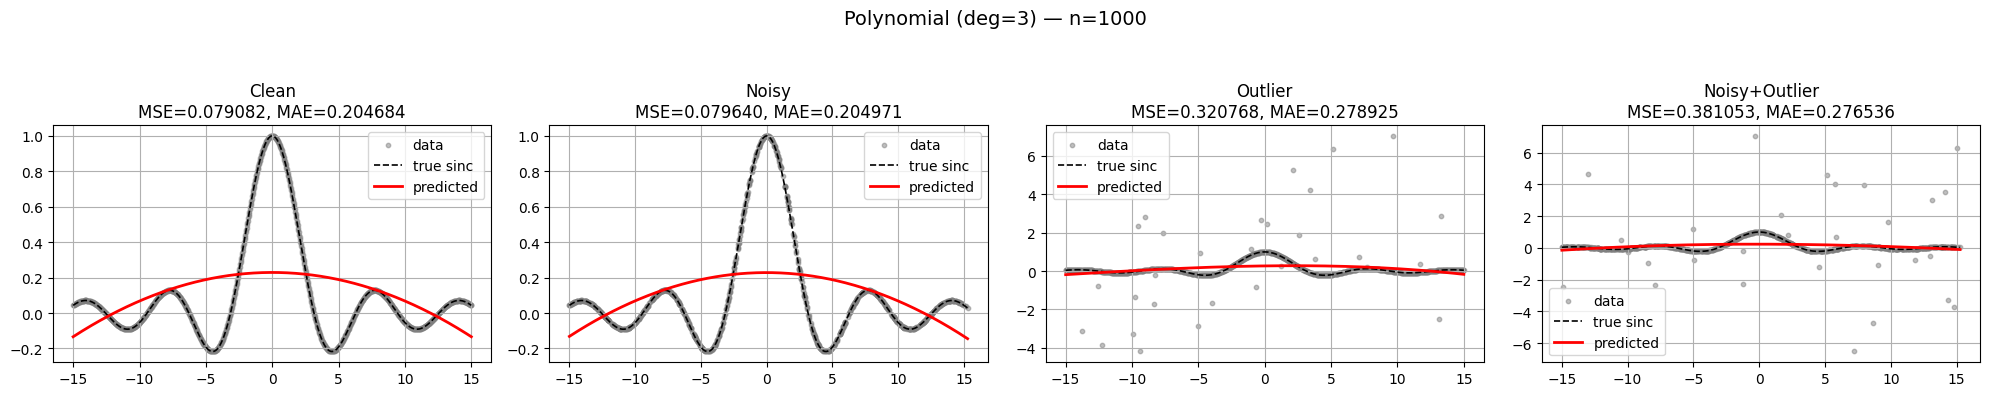

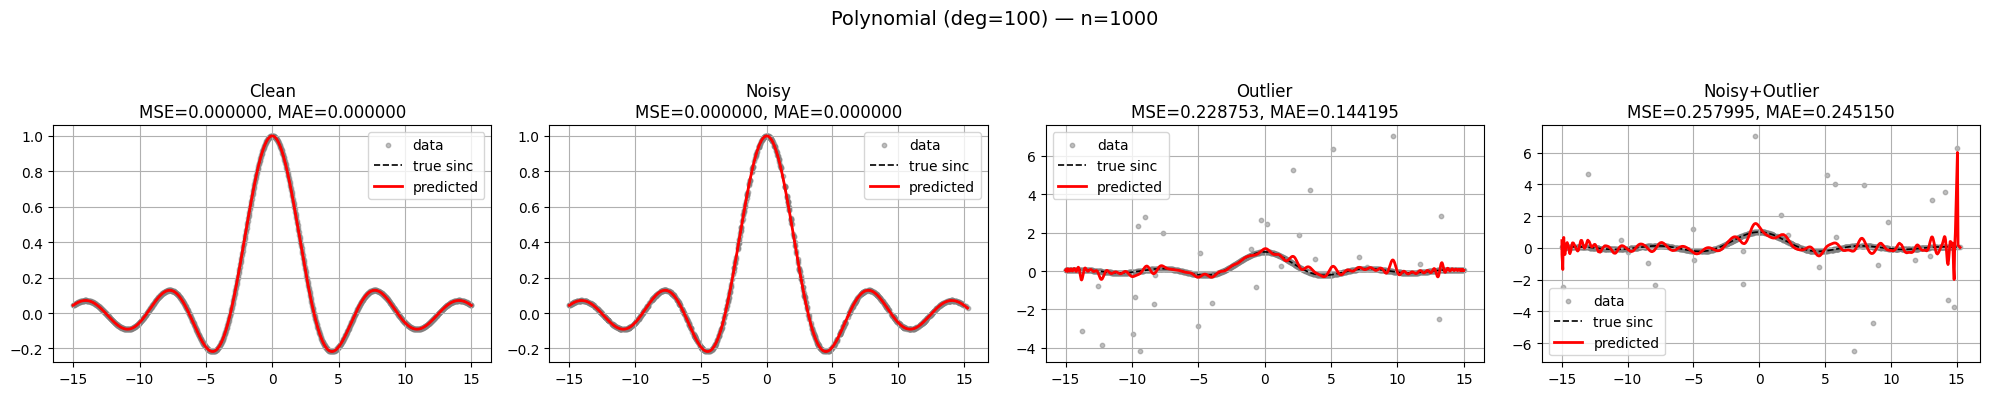

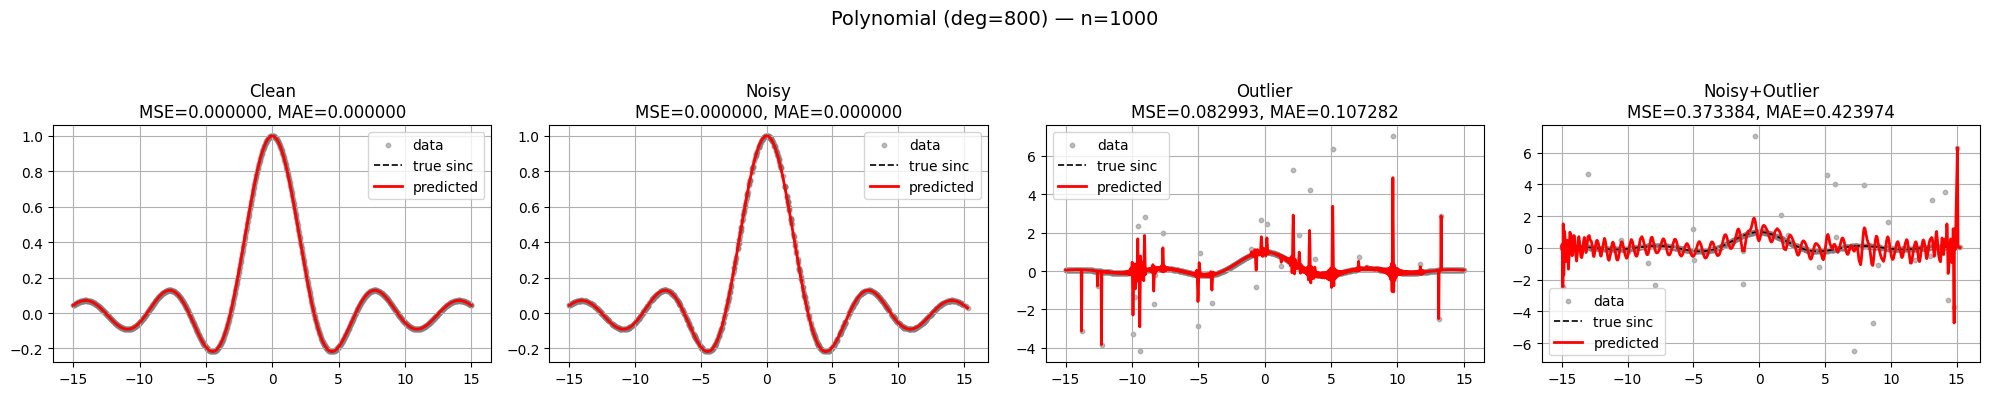

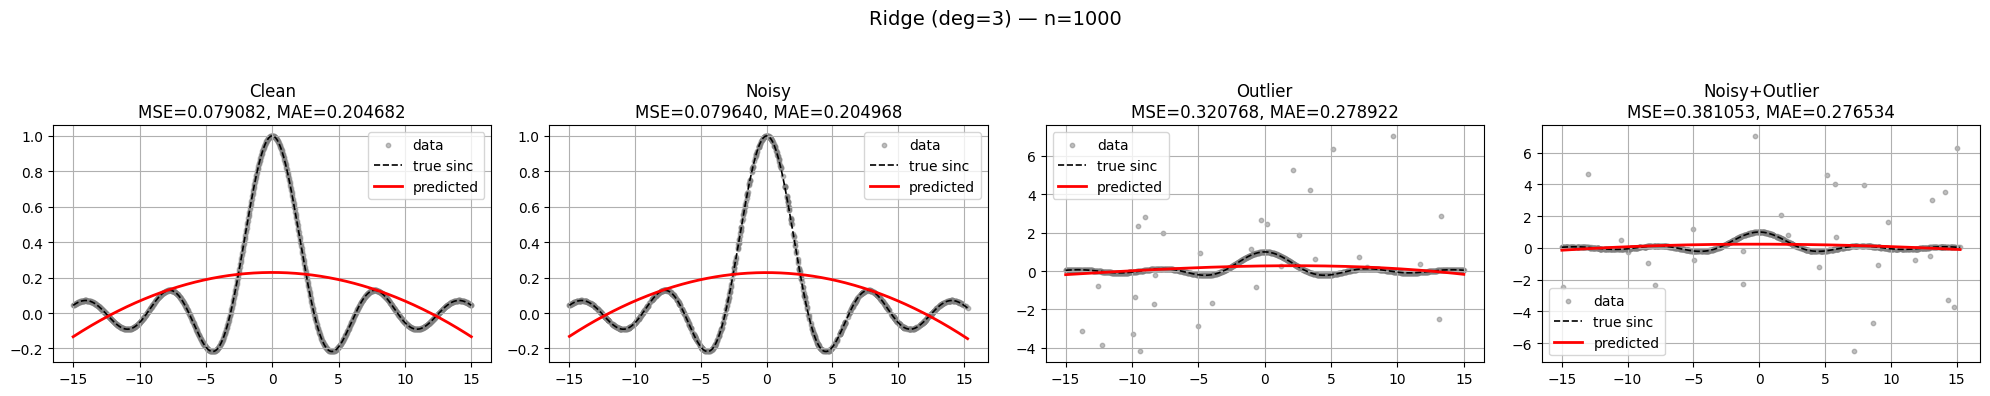

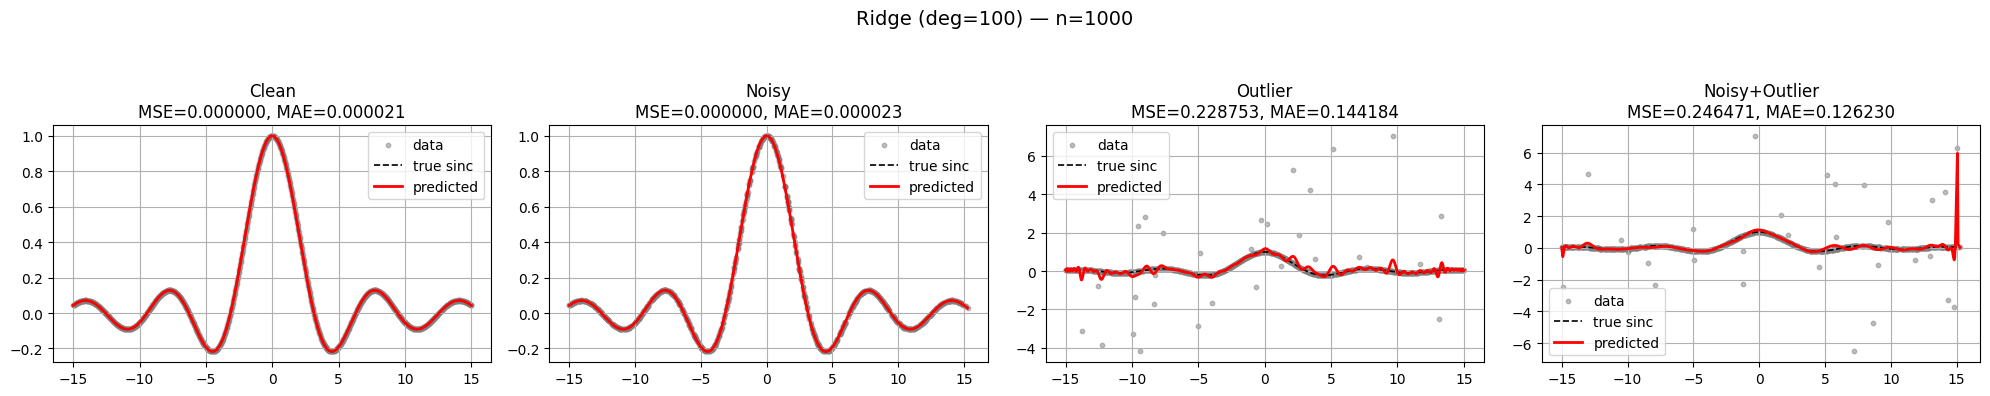

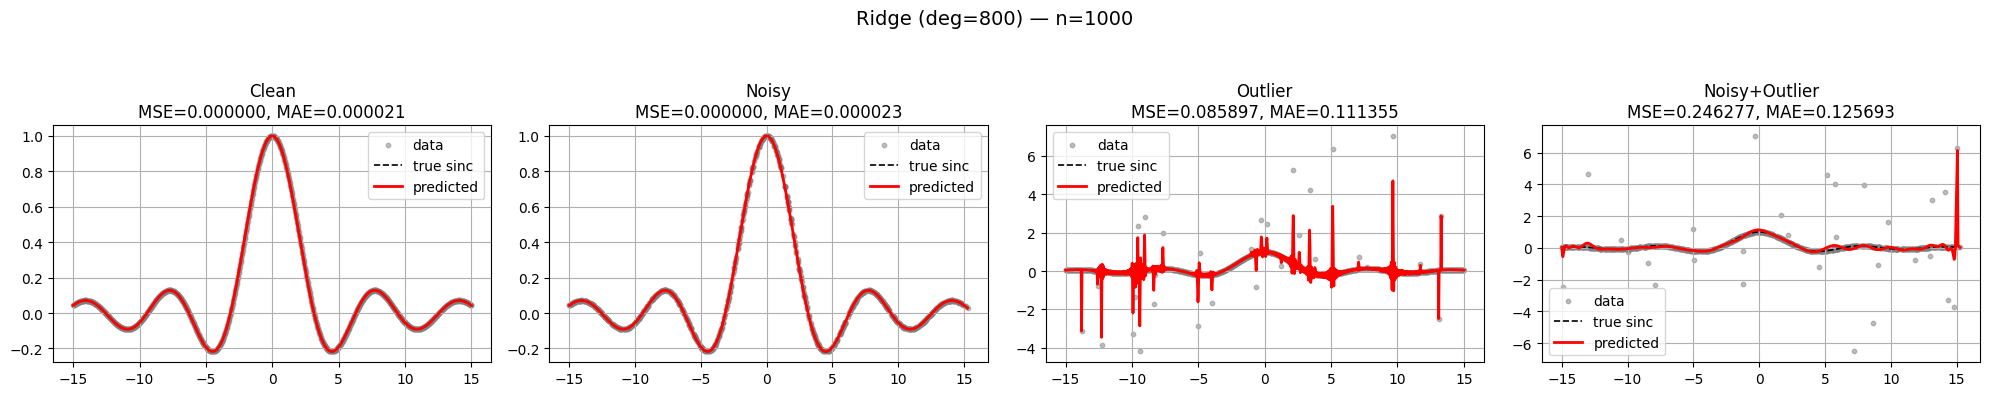

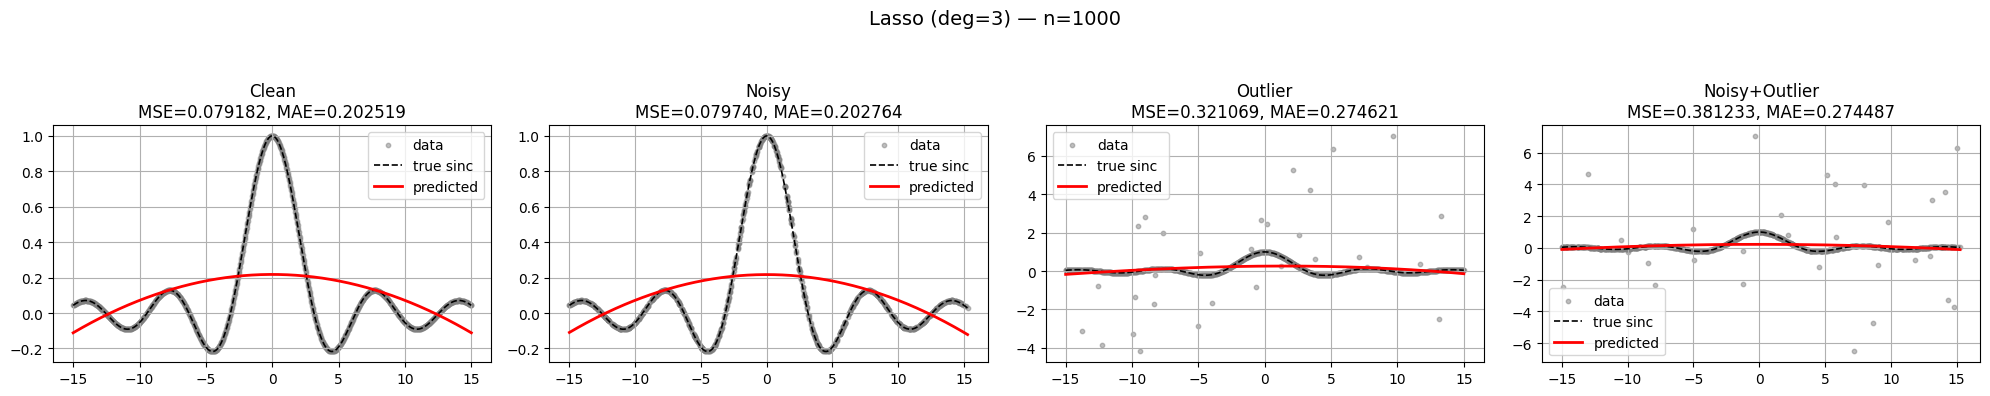

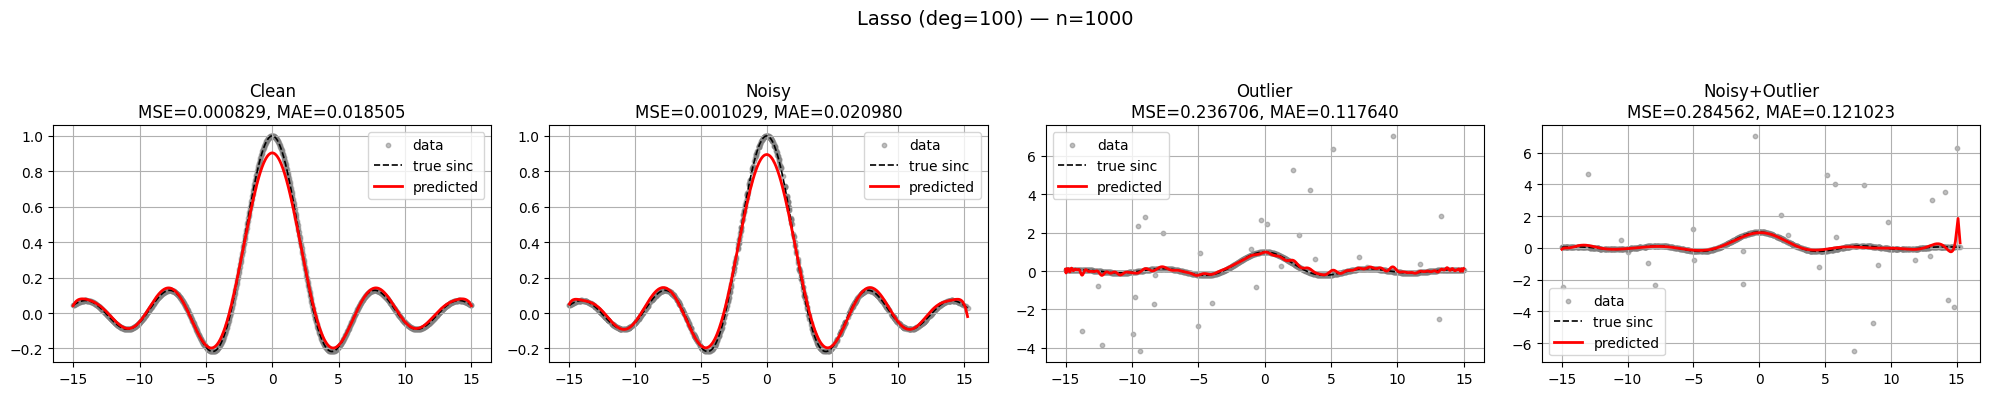

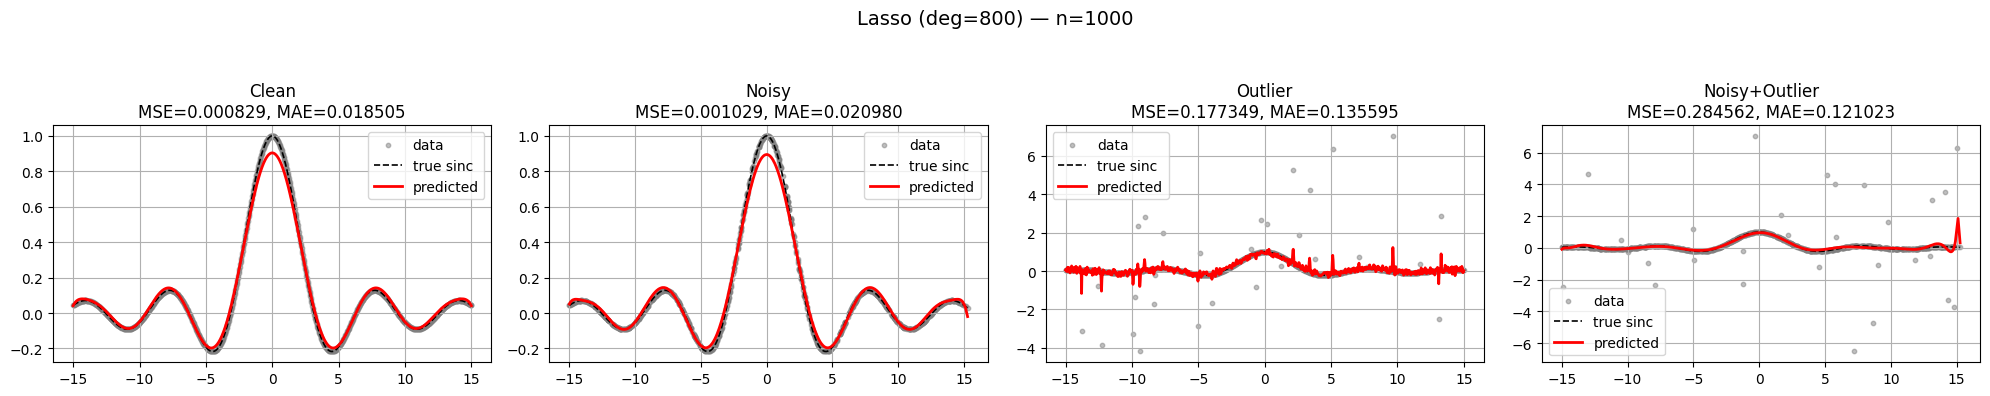

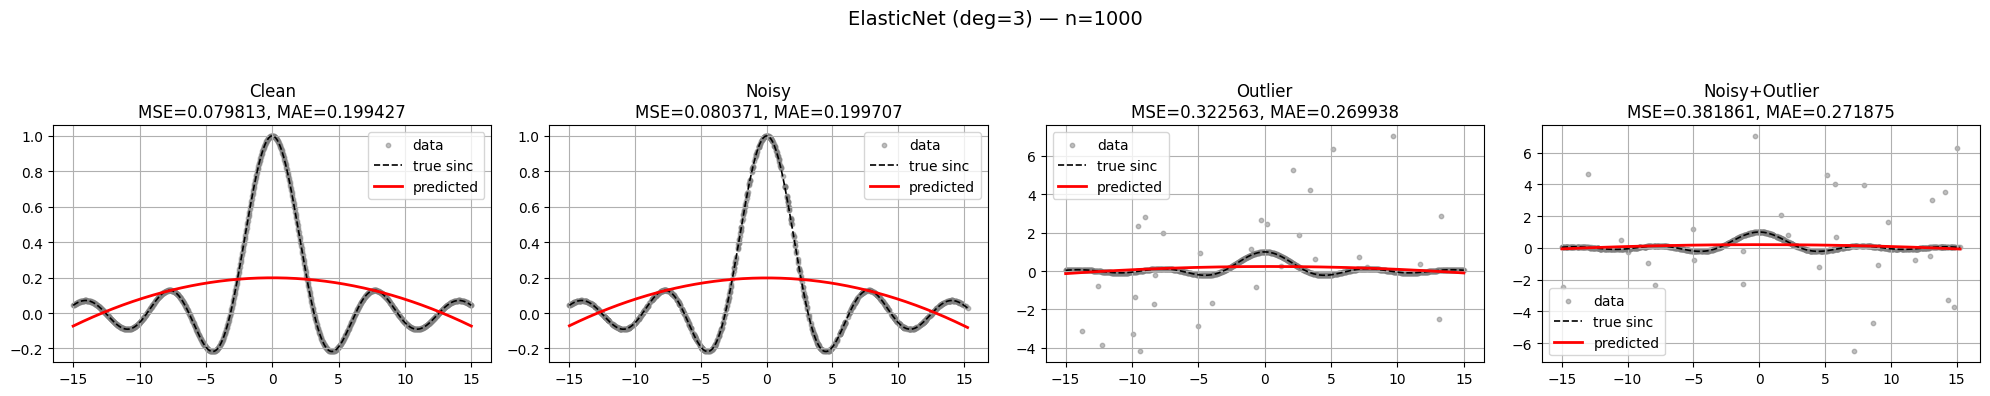

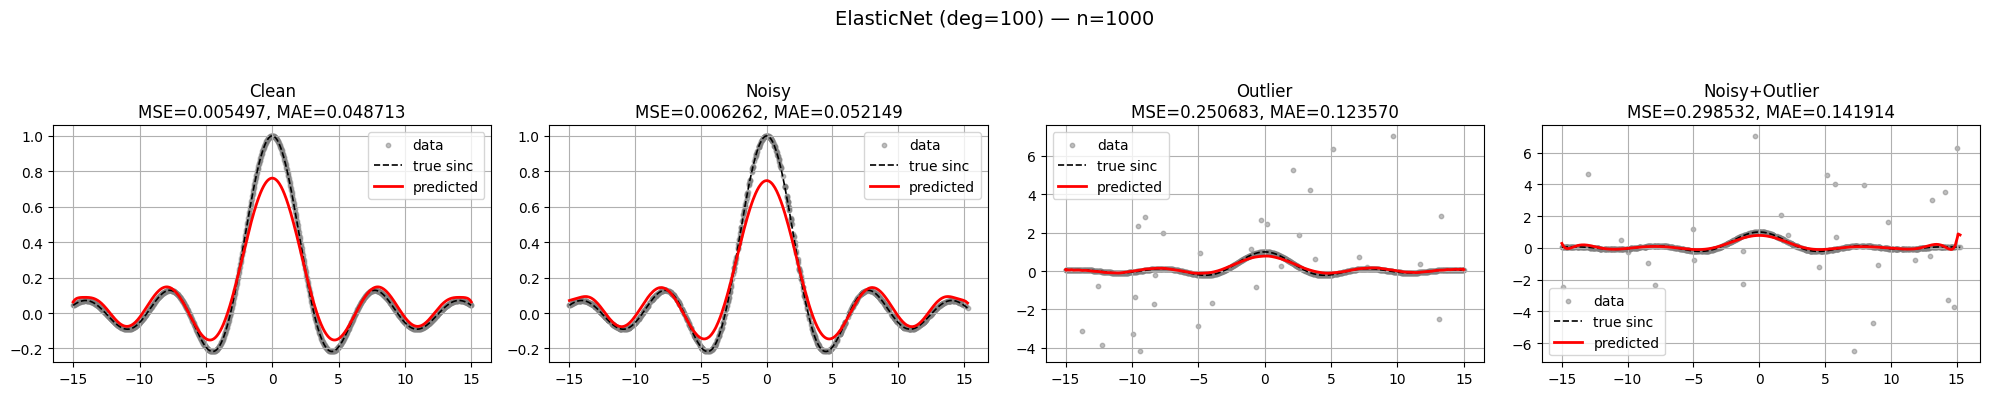

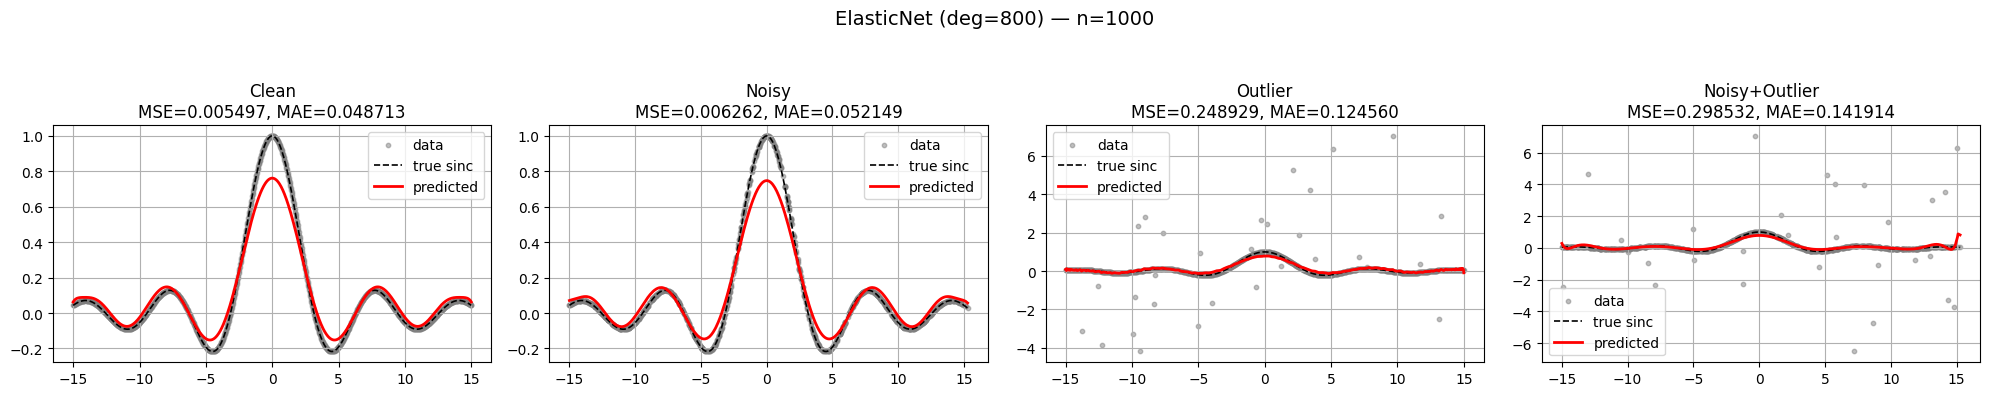


=== BEST (based on MSE) per Model & Dataset ===

     Model  Degree       Dataset    MSE    MAE
ElasticNet     100         Clean 0.0055 0.0487
ElasticNet     100         Noisy 0.0063 0.0521
ElasticNet     100 Noisy+Outlier 0.2985 0.1419
ElasticNet     800       Outlier 0.2489 0.1246
     Lasso     100         Clean 0.0008 0.0185
     Lasso     100         Noisy 0.0010 0.0210
     Lasso     100 Noisy+Outlier 0.2846 0.1210
     Lasso     800       Outlier 0.1773 0.1356
    Linear       1         Clean 0.0908 0.2059
    Linear       1         Noisy 0.0913 0.2061
    Linear       1 Noisy+Outlier 0.3924 0.2803
    Linear       1       Outlier 0.3390 0.2770
Polynomial     100         Clean 0.0000 0.0000
Polynomial     100         Noisy 0.0000 0.0000
Polynomial     100 Noisy+Outlier 0.2580 0.2452
Polynomial     800       Outlier 0.0830 0.1073
     Ridge     100         Clean 0.0000 0.0000
     Ridge     100         Noisy 0.0000 0.0000
     Ridge     800 Noisy+Outlier 0.2463 0.1257
     Ridge

In [24]:
# -*- coding: utf-8 -*-
"""
Stable implementation for n=1000 using orthogonal Legendre basis to avoid overflow
Degrees tested: 3, 100, 800
Four datasets: Clean, Noisy (Gaussian on x), Outlier (3%), Noisy+Outlier
Models: Linear (degree=1), Polynomial (via Legendre basis), Ridge, Lasso, ElasticNet
Computes MSE and MAE and shows 3x4 (rows=degrees, cols=datasets) plots per model.
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy.polynomial.legendre import legvander
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# تنظیمات پایه
# ---------------------------
np.random.seed(42)
n_points = 1000
x = np.linspace(-15, 15, n_points)

def sinc(xv):
    y = np.ones_like(xv, dtype=float)
    nz = xv != 0
    y[nz] = np.sin(xv[nz]) / xv[nz]
    return y

y_true = sinc(x)

# نویز و اوت لایر
noise_std = 0.2
x_noisy = x + np.random.normal(0, noise_std, size=n_points)

def add_outliers(y, percentage=0.03, magnitude=3.0):
    y_out = y.copy()
    n_outliers = max(1, int(len(y) * percentage))
    idx = np.random.choice(len(y), n_outliers, replace=False)
    y_out[idx] += magnitude * np.random.randn(n_outliers)
    return y_out

datasets = {
    "Clean": (x.copy(), sinc(x.copy())),
    "Noisy": (x_noisy.copy(), sinc(x_noisy.copy())),
    "Outlier": (x.copy(), add_outliers(sinc(x.copy()))),
    "Noisy+Outlier": (x_noisy.copy(), add_outliers(sinc(x_noisy.copy())))
}

# ---------------------------
# طراحی ماتریس با لژاندر برای پایداری عددی
# ---------------------------
def design_matrix_legendre(x_arr, degree, x_domain=(-15, 15)):
    a, b = x_domain
    x_scaled = 2 * (x_arr - a) / (b - a) - 1
    V = legvander(x_scaled, degree)
    return V

# ---------------------------
# helper: fit model on design matrix
# ---------------------------
def fit_and_eval_via_design(X_design, y, model_type='linear', alpha=0.1, l1_ratio=0.5):
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X_design)

    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'ridge':
        model = Ridge(alpha=alpha, max_iter=20000)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha, max_iter=200000)
    elif model_type == 'elasticnet':
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=200000)
    else:
        raise ValueError("Unknown model_type")

    model.fit(Xs, y)
    y_pred = model.predict(Xs)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return y_pred, mse, mae, model

# ---------------------------
# مدل‌ها و درجات
# ---------------------------
degrees = [3, 100, 800]
models_to_run = [
    ('Linear', 'linear', [1]),
    ('Polynomial', 'linear', degrees),
    ('Ridge', 'ridge', degrees),
    ('Lasso', 'lasso', degrees),
    ('ElasticNet', 'elasticnet', degrees)
]

ridge_alpha = 0.1
lasso_alpha = 0.01
enet_alpha = 0.05
enet_l1 = 0.5

results = []

# ---------------------------
# اجرای مدل‌ها
# ---------------------------
for model_label, model_type, deg_list in models_to_run:
    for deg in deg_list:
        preds = {}
        metrics = {}
        for ds_name, (x_d, y_d) in datasets.items():
            X_design = design_matrix_legendre(x_d, deg, x_domain=(x.min(), x.max()))
            if model_type == 'linear':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'linear')
            elif model_label == 'Polynomial' and model_type == 'linear':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'linear')
            elif model_label == 'Ridge':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'ridge', alpha=ridge_alpha)
            elif model_label == 'Lasso':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'lasso', alpha=lasso_alpha)
            elif model_label == 'ElasticNet':
                y_pred, mse, mae, fitted = fit_and_eval_via_design(X_design, y_d, 'elasticnet', alpha=enet_alpha, l1_ratio=enet_l1)
            preds[ds_name] = (x_d, y_d, y_pred)
            metrics[ds_name] = {'mse': mse, 'mae': mae}
            results.append({
                'Model': model_label,
                'Degree': deg,
                'Dataset': ds_name,
                'MSE': mse,
                'MAE': mae
            })

        # رسم نمودار برای هر مدل و درجه
        fig, axes = plt.subplots(1, 4, figsize=(20,4))
        fig.suptitle(f"{model_label} (deg={deg}) — n={n_points}", fontsize=14)
        for ax, ds_name in zip(axes, ['Clean','Noisy','Outlier','Noisy+Outlier']):
            x_d, y_d, y_pred = preds[ds_name]
            order = np.argsort(x_d)
            ax.scatter(x_d, y_d, s=10, alpha=0.5, color='gray', label='data')
            ax.plot(x_d[order], sinc(x_d[order]), 'k--', lw=1.2, label='true sinc')
            ax.plot(x_d[order], y_pred[order], 'r', lw=2, label='predicted')
            ax.set_title(f"{ds_name}\nMSE={metrics[ds_name]['mse']:.6f}, MAE={metrics[ds_name]['mae']:.6f}")
            ax.grid(True)
            ax.legend()
        plt.tight_layout(rect=[0,0,1,0.92])
        plt.show()

# ---------------------------
# گزارش بهترین مدل‌ها بر اساس MSE
# ---------------------------
import pandas as pd
df = pd.DataFrame(results)
best_summary = df.loc[df.groupby(['Model','Dataset'])['MSE'].idxmin()].reset_index(drop=True)
print("\n=== BEST (based on MSE) per Model & Dataset ===\n")
print(best_summary.to_string(index=False))
